In [ ]:
import pandas as pd

In [ ]:

df = pd.read_excel('/content/drive/MyDrive/MySelfVersionProjects/datasets/EDLFs_data_paper/edlfs_and_baselines.xlsx', sheet_name='SSL_models')


In [ ]:
df_rawnet
df_lfcc_lcnn
df_lfcc_gmm

In [ ]:
y_test_no_miss= pd.read_excel('/content/drive/MyDrive/MySelfVersionProjects/datasets/sample_set_5_ver3_for_vggish/y_test_missingValuesDroped.xlsx')

In [ ]:

df_working = pd.read_excel('/content/drive/MyDrive/MySelfVersionProjects/datasets/EDLFs_data_paper/edlfs_and_baselines.xlsx', sheet_name='WORKING')


In [ ]:

df_lfcc = pd.read_excel('/content/drive/MyDrive/MySelfVersionProjects/datasets/EDLFs_data_paper/edlfs_and_baselines.xlsx', sheet_name='LFCC_LCNN')


In [ ]:

df_lfcc = df_lfcc[['Clip_ID_before', 'Score']]


In [ ]:

df_lfcc.rename(columns={'Clip_ID_before': 'Clip_ID'}, inplace=True)


/tmp/ipython-input-2946416805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lfcc.rename(columns={'Clip_ID_before': 'Clip_ID'}, inplace=True)


In [ ]:
df_lfcc.rename(columns={'Score': 'Score_LFCC_LCNN'}, inplace=True)

/tmp/ipython-input-2042640498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lfcc.rename(columns={'Score': 'Score_LFCC_LCNN'}, inplace=True)


In [ ]:

df_working2 = pd.merge(df_working, df_lfcc, on='Clip_ID', how='left')


In [ ]:
df_working2.columns

Index(['Clip_ID', 'Label_x', 'PitchAnomaly_x', 'PauseAnomaly', 'BurstsAnomaly',
       'intakeOrOuttakeofBreath_x', 'SoundQualityAnomay_x', 'type_x',
       'y_true_x', 'gmm_score', 'y_pred_gmm', 'y_pred_LFCC',
       'SoundQualityAnomay_y', 'y_pred_edlf_test', 'y_pred_edlf_lfcc_test',
       'fake', 'score_real_rawnet', 'y_pred_rawnet', 'y_pred_aldas_rawnet',
       'Score_LFCC_LCNN'],
      dtype='object')

In [ ]:
df_working2.to_excel('df_work.xlsx')

In [ ]:
df_working2 = df_working

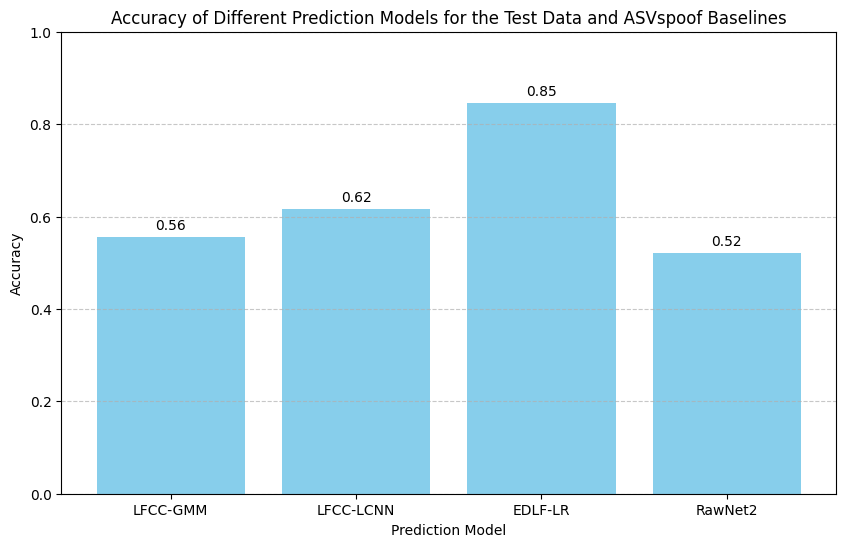

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

y_true = df_working2['y_true_x']

# List of prediction columns to evaluate
prediction_cols = ['y_pred_gmm', 'y_pred_LFCC', 'y_pred_edlf_test', 'y_pred_rawnet']

# Calculate accuracy for each prediction column
accuracies = {}
for col in prediction_cols:
    # Drop rows where y_true or y_pred is NaN for accurate calculation
    temp_df = df_working2[[y_true.name, col]].dropna()
    if not temp_df.empty:
        accuracies[col] = accuracy_score(temp_df[y_true.name], temp_df[col])
    else:
        accuracies[col] = 0 # Or handle as appropriate if all values are missing
label_map = {
    'y_pred_gmm': 'LFCC-GMM',
    'y_pred_LFCC': 'LFCC-LCNN',
    'y_pred_edlf_test': 'EDLF-LR',
    'y_pred_rawnet': 'RawNet2'
}

# Create a DataFrame for plotting
accuracy_df = pd.DataFrame(
    [(label_map.get(k, k), v) for k, v in accuracies.items()],
    columns=['Model', 'Accuracy']
)


# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'], color='skyblue')
plt.xlabel('Prediction Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Prediction Models for the Test Data and ASVspoof Baselines')
plt.ylim(0, 1) # Accuracy is between 0 and 1
for index, value in enumerate(accuracy_df['Accuracy']):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

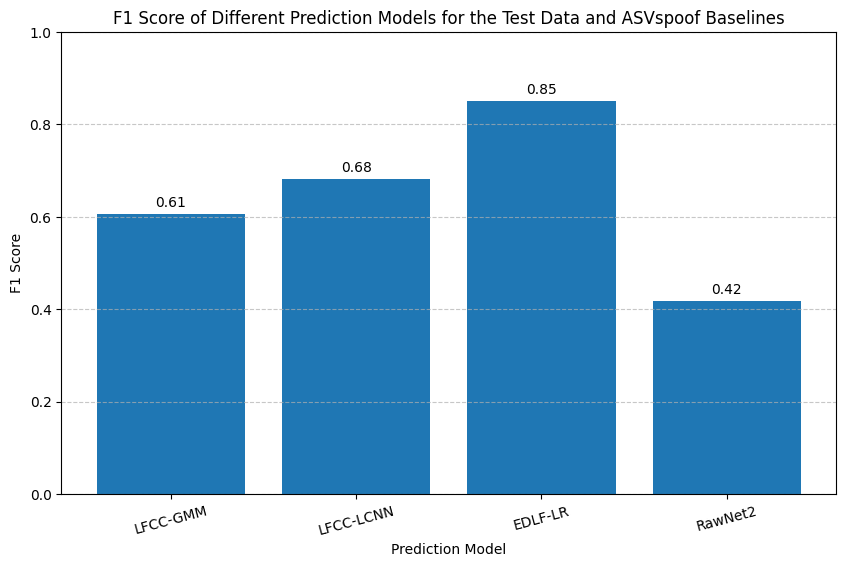

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

y_true_col = 'y_true_x'

prediction_cols = [
    'y_pred_gmm',
    'y_pred_LFCC',
    'y_pred_edlf_test',
    'y_pred_rawnet'
]

# Human-readable labels
label_map = {
    'y_pred_gmm': 'LFCC-GMM',
    'y_pred_LFCC': 'LFCC-LCNN',
    'y_pred_edlf_test': 'EDLF-LR',
    'y_pred_rawnet': 'RawNet2'
}

# Calculate F1 scores
f1_scores = {}
for col in prediction_cols:
    temp_df = df_working2[[y_true_col, col]].dropna()
    if not temp_df.empty:
        f1_scores[col] = f1_score(
            temp_df[y_true_col],
            temp_df[col],
            average='binary'  # change if multiclass
        )
    else:
        f1_scores[col] = 0

# Create DataFrame for plotting
f1_df = pd.DataFrame(
    [(label_map.get(k, k), v) for k, v in f1_scores.items()],
    columns=['Model', 'F1 Score']
)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(f1_df['Model'], f1_df['F1 Score'])
plt.xlabel('Prediction Model')
plt.ylabel('F1 Score')
plt.title('F1 Score of Different Prediction Models for the Test Data and ASVspoof Baselines')
plt.ylim(0, 1)

for index, value in enumerate(f1_df['F1 Score']):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


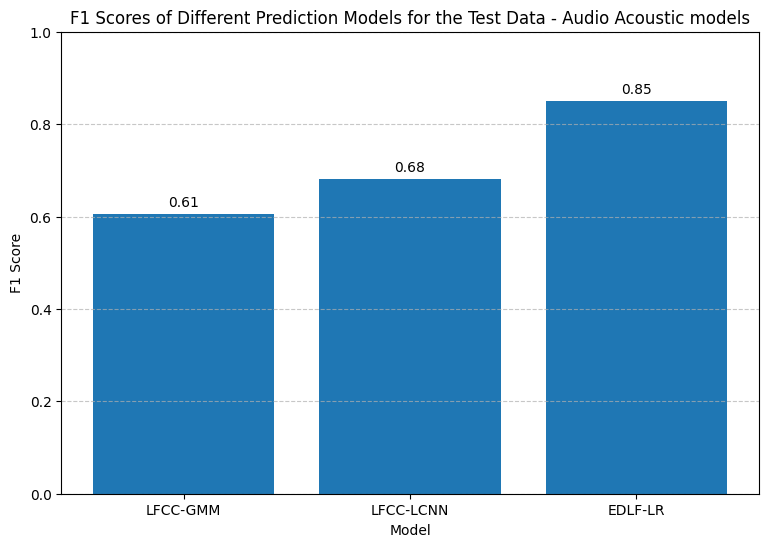

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

y_true_col = 'y_true_x'

# Prediction columns (RawNet removed)
prediction_cols = [
    'y_pred_gmm',
    'y_pred_LFCC',
    'y_pred_edlf_test'
]

# Fixed, clean labels
label_map = {
    'y_pred_gmm': 'LFCC-GMM',
    'y_pred_LFCC': 'LFCC-LCNN',
    'y_pred_edlf_test': 'EDLF-LR'
}

# Calculate F1 scores
f1_scores = {}
for col in prediction_cols:
    temp_df = df_working2[[y_true_col, col]].dropna()
    if not temp_df.empty:
        f1_scores[col] = f1_score(
            temp_df[y_true_col],
            temp_df[col],
            average='binary'  # change if multiclass
        )
    else:
        f1_scores[col] = 0

# Create DataFrame for plotting
f1_df = pd.DataFrame(
    [(label_map[col], score) for col, score in f1_scores.items()],
    columns=['Model', 'F1 Score']
)

# Plot
plt.figure(figsize=(9, 6))
plt.bar(f1_df['Model'], f1_df['F1 Score'])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Scores of Different Prediction Models for the Test Data - Audio Acoustic models')
plt.ylim(0, 1)

for i, v in enumerate(f1_df['F1 Score']):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


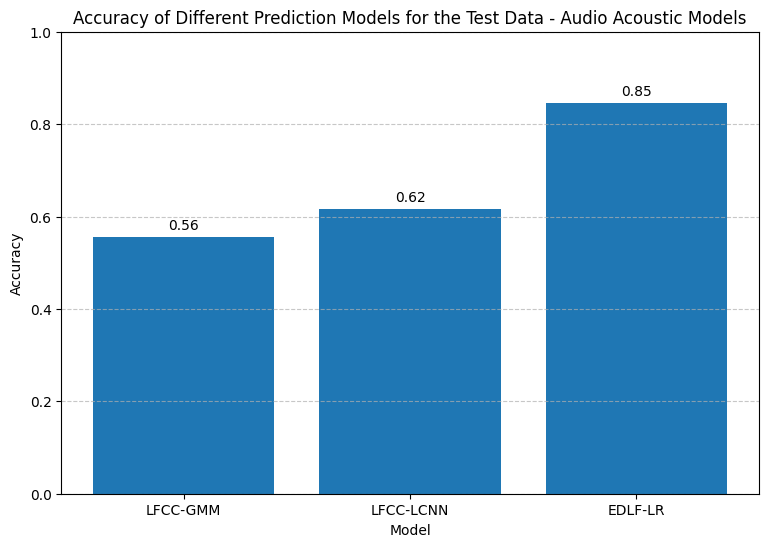

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

y_true_col = 'y_true_x'

# Prediction columns (RawNet removed)
prediction_cols = [
    'y_pred_gmm',
    'y_pred_LFCC',
    'y_pred_edlf_test'
]

# Fixed, clean labels
label_map = {
    'y_pred_gmm': 'LFCC-GMM',
    'y_pred_LFCC': 'LFCC-LCNN',
    'y_pred_edlf_test': 'EDLF-LR'
}

# Calculate Accuracy scores
accuracy_scores = {}
for col in prediction_cols:
    temp_df = df_working2[[y_true_col, col]].dropna()
    if not temp_df.empty:
        accuracy_scores[col] = accuracy_score(
            temp_df[y_true_col],
            temp_df[col]
        )
    else:
        accuracy_scores[col] = 0

# Create DataFrame for plotting
accuracy_df = pd.DataFrame(
    [(label_map[col], score) for col, score in accuracy_scores.items()],
    columns=['Model', 'Accuracy']
)

# Plot
plt.figure(figsize=(9, 6))
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Prediction Models for the Test Data - Audio Acoustic Models')
plt.ylim(0, 1)

for i, v in enumerate(accuracy_df['Accuracy']):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
df_working['y_pred_test_edlf_lfcc_gmm'] = (
    (df_working['y_pred_edlf_test'] == 1) |
    (df_working['y_pred_gmm'] == 1)
).astype(int)


In [ ]:
df_working['y_pred_test_edlf_rawnet'] = (
    (df_working['y_pred_edlf_test'] == 1) |
    (df_working['y_pred_rawnet'] == 1)
).astype(int)


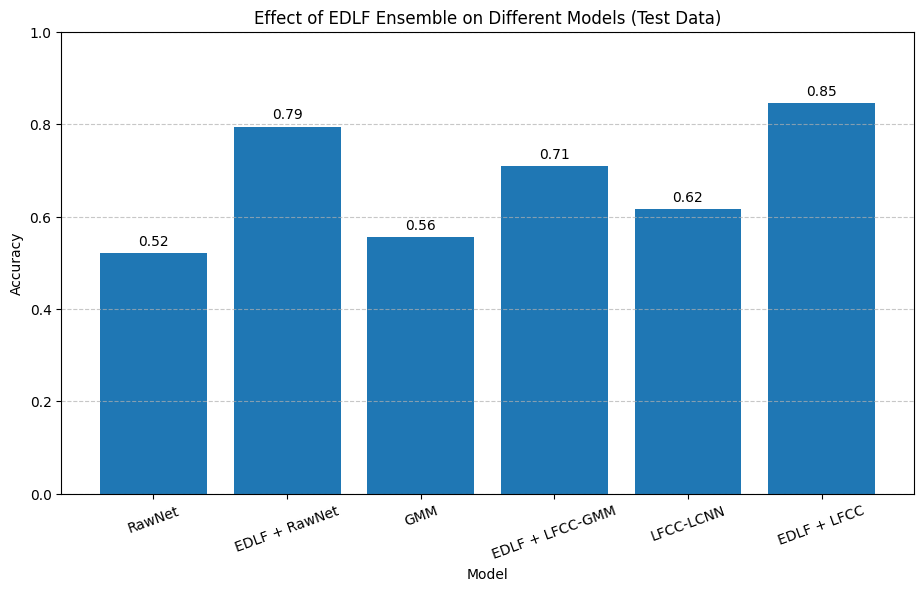

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

y_true_col = 'y_true_x'

# Models to compare
prediction_cols = [
    'y_pred_rawnet',
    'y_pred_test_edlf_rawnet',
    'y_pred_gmm',
    'y_pred_test_edlf_lfcc_gmm',
    'y_pred_LFCC',
    'y_pred_edlf_lfcc_test'
]

# Clean labels for plotting
label_map = {
    'y_pred_rawnet': 'RawNet',
    'y_pred_test_edlf_rawnet': 'EDLF + RawNet',
    'y_pred_gmm': 'GMM',
    'y_pred_test_edlf_lfcc_gmm': 'EDLF + LFCC-GMM',
    'y_pred_LFCC': 'LFCC-LCNN',
    'y_pred_edlf_lfcc_test': 'EDLF + LFCC'
}

# Compute accuracies
accuracies = {}
for col in prediction_cols:
    temp_df = df_working[[y_true_col, col]].dropna()
    if not temp_df.empty:
        accuracies[col] = accuracy_score(
            temp_df[y_true_col],
            temp_df[col]
        )
    else:
        accuracies[col] = 0

# Create DataFrame
acc_df = pd.DataFrame(
    [(label_map[col], acc) for col, acc in accuracies.items()],
    columns=['Model', 'Accuracy']
)

# Plot
plt.figure(figsize=(11, 6))
plt.bar(acc_df['Model'], acc_df['Accuracy'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Effect of EDLF Ensemble on Different Models (Test Data)')
plt.ylim(0, 1)

for i, v in enumerate(acc_df['Accuracy']):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


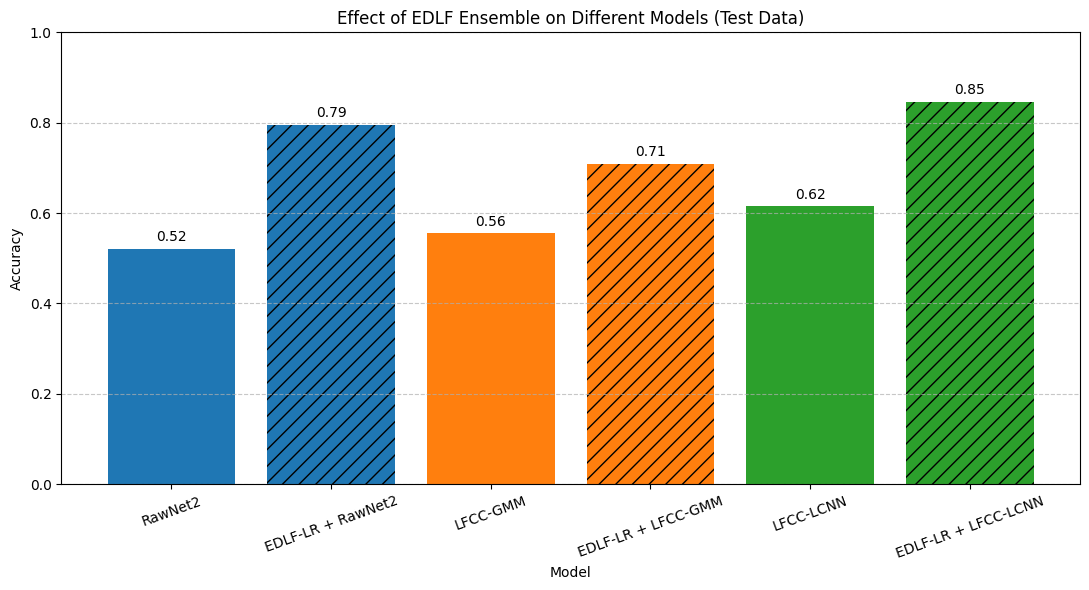

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

y_true_col = 'y_true_x'

# Models to compare
prediction_cols = [
    'y_pred_rawnet',
    'y_pred_test_edlf_rawnet',
    'y_pred_gmm',
    'y_pred_test_edlf_lfcc_gmm',
    'y_pred_LFCC',
    'y_pred_edlf_lfcc_test'
]

# Corrected labels
label_map = {
    'y_pred_rawnet': 'RawNet2',
    'y_pred_test_edlf_rawnet': 'EDLF-LR + RawNet2',  # fixed
    'y_pred_gmm': 'LFCC-GMM',
    'y_pred_test_edlf_lfcc_gmm': 'EDLF-LR + LFCC-GMM',
    'y_pred_LFCC': 'LFCC-LCNN',
    'y_pred_edlf_lfcc_test': 'EDLF-LR + LFCC-LCNN'
}

# Colors (same color for base + ensemble)
color_map = {
    'RawNet2': '#1f77b4',
    'EDLF-LR + RawNet2': '#1f77b4',  # fixed
    'LFCC-GMM': '#ff7f0e',
    'EDLF-LR + LFCC-GMM': '#ff7f0e',
    'LFCC-LCNN': '#2ca02c',
    'EDLF-LR + LFCC-LCNN': '#2ca02c'
}

# Hatch patterns for black & white printing
hatch_map = {
    'RawNet2': '',
    'EDLF-LR + RawNet2': '//',       # fixed
    'LFCC-GMM': '',
    'EDLF-LR + LFCC-GMM': '//',
    'LFCC-LCNN': '',
    'EDLF-LR + LFCC-LCNN': '//'
}

# Compute accuracies
accuracies = {}
for col in prediction_cols:
    temp_df = df_working[[y_true_col, col]].dropna()
    if not temp_df.empty:
        accuracies[col] = accuracy_score(temp_df[y_true_col], temp_df[col])
    else:
        accuracies[col] = 0

# Create DataFrame
acc_df = pd.DataFrame(
    [(label_map[col], acc) for col, acc in accuracies.items()],
    columns=['Model', 'Accuracy']
)

# Plot
plt.figure(figsize=(11, 6))
bars = []
for i, row in acc_df.iterrows():
    bars.append(
        plt.bar(
            i,
            row['Accuracy'],
            color=color_map[row['Model']],
            hatch=hatch_map[row['Model']]
        )
    )

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Effect of EDLF Ensemble on Different Models (Test Data)')
plt.ylim(0, 1)

# Add accuracy labels above bars
for i, v in enumerate(acc_df['Accuracy']):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.xticks(range(len(acc_df)), acc_df['Model'], rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


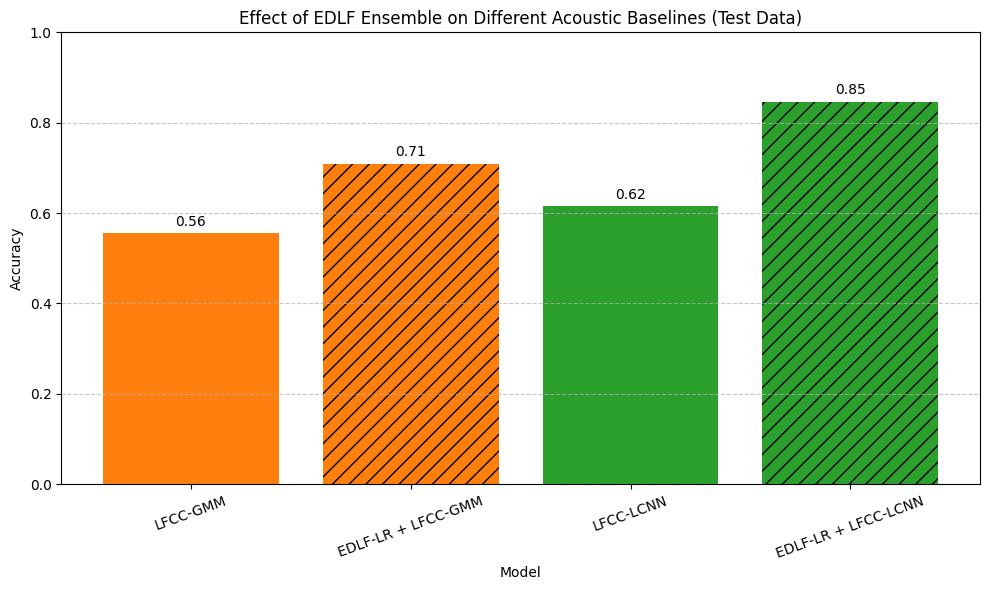

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

y_true_col = 'y_true_x'

# Models to compare (RawNet2 and its ensemble removed)
prediction_cols = [
    'y_pred_gmm',
    'y_pred_test_edlf_lfcc_gmm',
    'y_pred_LFCC',
    'y_pred_edlf_lfcc_test'
]

# Updated labels
label_map = {
    'y_pred_gmm': 'LFCC-GMM',
    'y_pred_test_edlf_lfcc_gmm': 'EDLF-LR + LFCC-GMM',
    'y_pred_LFCC': 'LFCC-LCNN',
    'y_pred_edlf_lfcc_test': 'EDLF-LR + LFCC-LCNN'
}

# Colors for each pair (base + ensemble)
color_map = {
    'LFCC-GMM': '#ff7f0e',
    'EDLF-LR + LFCC-GMM': '#ff7f0e',
    'LFCC-LCNN': '#2ca02c',
    'EDLF-LR + LFCC-LCNN': '#2ca02c'
}

# Hatch patterns for black & white printing
hatch_map = {
    'LFCC-GMM': '',
    'EDLF-LR + LFCC-GMM': '//',
    'LFCC-LCNN': '',
    'EDLF-LR + LFCC-LCNN': '//'
}

# Compute accuracies
accuracies = {}
for col in prediction_cols:
    temp_df = df_working[[y_true_col, col]].dropna()
    if not temp_df.empty:
        accuracies[col] = accuracy_score(temp_df[y_true_col], temp_df[col])
    else:
        accuracies[col] = 0

# Create DataFrame
acc_df = pd.DataFrame(
    [(label_map[col], acc) for col, acc in accuracies.items()],
    columns=['Model', 'Accuracy']
)

# Plot
plt.figure(figsize=(10, 6))
bars = []
for i, row in acc_df.iterrows():
    bars.append(
        plt.bar(
            i,
            row['Accuracy'],
            color=color_map[row['Model']],
            hatch=hatch_map[row['Model']]
        )
    )

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Effect of EDLF Ensemble on Different Acoustic Baselines (Test Data)')
plt.ylim(0, 1)

# Add accuracy labels above bars
for i, v in enumerate(acc_df['Accuracy']):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.xticks(range(len(acc_df)), acc_df['Model'], rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
df_working.columns

Index(['Unnamed: 0', 'Clip_ID', 'Label_x', 'PitchAnomaly_x', 'PauseAnomaly',
       'BurstsAnomaly', 'intakeOrOuttakeofBreath_x', 'SoundQualityAnomay_x',
       'type_x', 'y_true_x', 'gmm_score', 'y_pred_gmm', 'y_pred_LFCC',
       'SoundQualityAnomay_y', 'y_pred_edlf_test', 'y_pred_edlf_lfcc_test',
       'fake', 'score_real_rawnet', 'y_pred_rawnet', 'y_pred_aldas_rawnet',
       'Score_LFCC_LCNN', 'y_pred_test_edlf_lfcc_gmm',
       'y_pred_test_edlf_rawnet'],
      dtype='object')

In [ ]:
df.columns

Index(['ClipID', 'y_pred_mlp_test_encoded_xlsr_only',
       'HuBERT_encoded_MLP_probs', 'WavLM_probs',
       'EDLFs_LR_probs_burst_and_pause_dropped', 'type', 'y_true',
       'VGGish_MLP_probs'],
      dtype='object')

In [ ]:
df_dl = df_working[['Clip_ID','y_pred_edlf_test', 'y_pred_rawnet', 'y_pred_test_edlf_rawnet']]

In [ ]:
df_vggish = df[['ClipID','VGGish_MLP_probs']]

In [ ]:
df_dl.rename(columns={'Clip_ID': 'ClipID'}, inplace=True)

/tmp/ipython-input-1906821373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dl.rename(columns={'Clip_ID': 'ClipID'}, inplace=True)


In [ ]:

df_dl = pd.merge(df_dl, df_vggish, on='ClipID', how='left')


In [ ]:
import pandas as pd
import re

# Function to clean clip names
def clean_clipname(name):
    if not isinstance(name, str):
        return name
    # Remove leading/trailing spaces
    name = name.strip()
    # Remove file extensions at the end
    name = re.sub(r'\.(wav|flac)$', '', name, flags=re.IGNORECASE)
    # Remove spaces, underscores, hyphens, and parentheses
    name = re.sub(r'[\s_\-\(\)]', '', name)

    return name

# Apply cleaning to ClipID column
df_dl['ClipID'] = df_dl['ClipID'].apply(clean_clipname)


In [ ]:
# Show ClipIDs where VGGish_MLP_probs_y is NaN
nan_clipids = df_dl.loc[df_dl['VGGish_MLP_probs_y'].isna(), 'ClipID']
print(nan_clipids)


58     ZahraFake11
114    DFE20000791
Name: ClipID, dtype: object


In [ ]:
df_dl.to_excel('dl_temp.xlsx')

## Different ML models for EDLFs

In [ ]:
df_edlfs_train = pd.read_excel('/content/drive/MyDrive/MySelfVersionProjects/datasets/EDLFs_data_paper/SARA_CURRENT_2_6_2026_DATASET_EDLFs.xlsx', sheet_name='Train')

In [ ]:
df_edlfs_test = pd.read_excel('/content/drive/MyDrive/MySelfVersionProjects/datasets/EDLFs_data_paper/SARA_CURRENT_2_6_2026_DATASET_EDLFs.xlsx', sheet_name='Test')

In [ ]:
df_edlfs_train

,Clip_name,Link,Path_ID,PitchAnomaly,PauseAnomaly,BurstsAnomaly,IntakeOrOuttakeofBreath,SoundQualityAnomay,Type,y_true,Unnamed: 10
0,DF_E_2000055.wav,https://drive.google.com/file/d/1VHGwmg1ZwP4v7...,/content/drive/MyDrive/MySelfVersionProjects/a...,1,0,1,0,1,vc,1,NaN
1,DF_E_2000137.wav,https://drive.google.com/file/d/1x0aXd77XjI30Z...,/content/drive/MyDrive/MySelfVersionProjects/a...,0,0,0,0,1,vc,1,NaN
2,DF_E_2090179.wav,https://drive.google.com/file/d/1GClb7MjaoqR5V...,/content/drive/MyDrive/MySelfVersionProjects/a...,1,0,0,1,1,vc,1,NaN
3,DF_E_2000212.wav,https://drive.google.com/file/d/1N1HHF9U-SwMKk...,/content/drive/MyDrive/MySelfVersionProjects/a...,0,0,0,1,1,vc,1,NaN
4,DF_E_2000329.wav,https://drive.google.com/file/d/1lWdRgGyBhVpjC...,/content/drive/MyDrive/MySelfVersionProjects/a...,1,0,0,0,1,vc,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
728,DF_E_2001230.wav,https://drive.google.com/file/d/1MPYpoo2BCeiG8...,/content/drive/MyDrive/MySelfVersionProjects/a...,1,0,0,1,0,genuine,0,NaN
729,DF_E_2002202.wav,https://drive.google.com/file/d/1hMTyUGbqv5-T6...,/content/drive/MyDrive/MySelfVersionProjects/a...,0,0,0,0,1,genuine,0,NaN
730,DF_E_2002152.wav,https://drive.google.com/file/d/1itn0MYnlYglU3...,/content/drive/MyDrive/MySelfVersionProjects/a...,0,0,0,0,1,genuine,0,NaN
731,DF_E_2002420.wav,https://drive.google.com/file/d/1z-TB3t1lJJ0-o...,/content/drive/MyDrive/MySelfVersionProjects/a...,0,0,0,1,0,genuine,0,NaN


In [ ]:
df_edlfs_test

,Clip_name,Path_ID,PitchAnomaly,PauseAnomaly,BurstsAnomaly,IntakeOrOuttakeofBreath,SoundQualityAnomay,Type,y_true,Unnamed: 9,Unnamed: 10
0,E_1009181.wav,/content/drive/MyDrive/MySelfVersionProjects/a...,0.0,0.0,0.0,1.0,0.0,genuine,0.0,NaN,NaN
1,E_1007616.wav,/content/drive/MyDrive/MySelfVersionProjects/a...,0.0,1.0,0.0,0.0,0.0,genuine,0.0,NaN,NaN
2,E_1000600.wav,/content/drive/MyDrive/MySelfVersionProjects/a...,1.0,1.0,0.0,0.0,1.0,genuine,0.0,NaN,NaN
3,E_1010238.wav,/content/drive/MyDrive/MySelfVersionProjects/a...,0.0,0.0,0.0,0.0,0.0,genuine,0.0,NaN,NaN
4,E_1007135.wav,/content/drive/MyDrive/MySelfVersionProjects/a...,0.0,0.0,0.0,1.0,0.0,genuine,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
129,file249.wav,/content/drive/MyDrive/MySelfVersionProjects/a...,1.0,0.0,0.0,0.0,1.0,tts,1.0,NaN,NaN
130,PA_E_1008206.wav,/content/drive/MyDrive/MySelfVersionProjects/a...,0.0,0.0,0.0,0.0,1.0,replay_attack,1.0,NaN,NaN
131,KamalaR17.wav,/content/drive/MyDrive/MySelfVersionProjects/a...,0.0,1.0,0.0,0.0,0.0,genuine,0.0,NaN,NaN
132,file198.wav,/content/drive/MyDrive/MySelfVersionProjects/a...,1.0,0.0,0.0,0.0,1.0,tts,1.0,NaN,NaN


Training MLP...
Training LR...
Training SVM...
Training RandomForest...
Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [00:32:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


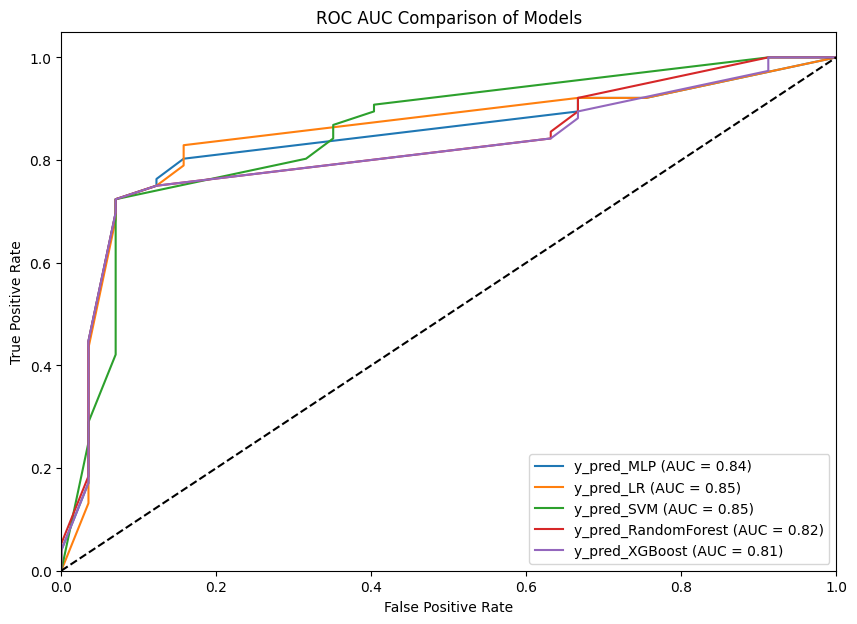

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

# -----------------------------
# Step 0: Drop NaNs
# -----------------------------
features = ['PitchAnomaly', 'PauseAnomaly', 'BurstsAnomaly',
            'IntakeOrOuttakeofBreath', 'SoundQualityAnomay']

train_data = df_edlfs_train.dropna(subset=features + ['y_true']).copy()
test_data = df_edlfs_test.dropna(subset=features + ['y_true']).copy()

X_train = train_data[features].apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(train_data['y_true'], errors='coerce')
X_test = test_data[features].apply(pd.to_numeric, errors='coerce')
y_test = pd.to_numeric(test_data['y_true'], errors='coerce')

# Drop any rows that became NaN after conversion
train_clean = X_train.join(y_train).dropna()
X_train = train_clean[features]
y_train = train_clean['y_true']

test_clean = X_test.join(y_test).dropna()
X_test = test_clean[features]
y_test = test_clean['y_true']

# -----------------------------
# Step 1: Define models and param grids
# -----------------------------
models = {
    'MLP': MLPClassifier(max_iter=500, random_state=42),
    'LR': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

param_grids = {
    'MLP': {'mlp__hidden_layer_sizes': [(50,), (100,)], 'mlp__alpha': [0.0001, 0.001]},
    'LR': {'lr__C': [0.1, 1, 10], 'lr__penalty': ['l2']},
    'SVM': {'svm__C': [0.1, 1, 10], 'svm__kernel': ['linear', 'rbf']},
    'XGBoost': {'xgboost__n_estimators': [100, 200], 'xgboost__max_depth': [3, 6], 'xgboost__learning_rate': [0.01, 0.1]}
}

# -----------------------------
# Step 2: Train models and save probabilities
# -----------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_probs = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    step_name = model_name.lower()

    # Scaling only for models that need it
    if model_name in ['MLP', 'LR', 'SVM']:
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            (step_name, model)
        ])
    else:
        # RandomForest and XGBoost
        pipe = Pipeline([
            (step_name, model)
        ])

    # Only use GridSearchCV for MLP, LR, SVM, XGBoost
    if model_name != 'RandomForest':
        param_grid = param_grids[model_name]
        grid = GridSearchCV(pipe, param_grid, cv=skf, scoring='roc_auc', n_jobs=-1, error_score='raise')
        grid.fit(X_train, y_train)
        y_pred_probs[f'y_pred_{model_name}'] = grid.predict_proba(X_test)[:,1]
    else:
        # RandomForest: just fit with default parameters
        pipe.fit(X_train, y_train)
        y_pred_probs[f'y_pred_{model_name}'] = pipe.predict_proba(X_test)[:,1]

# -----------------------------
# Step 3: Plot ROC AUC comparison
# -----------------------------
plt.figure(figsize=(10, 7))

for model_name, probs in y_pred_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Comparison of Models')
plt.legend(loc='lower right')
plt.show()


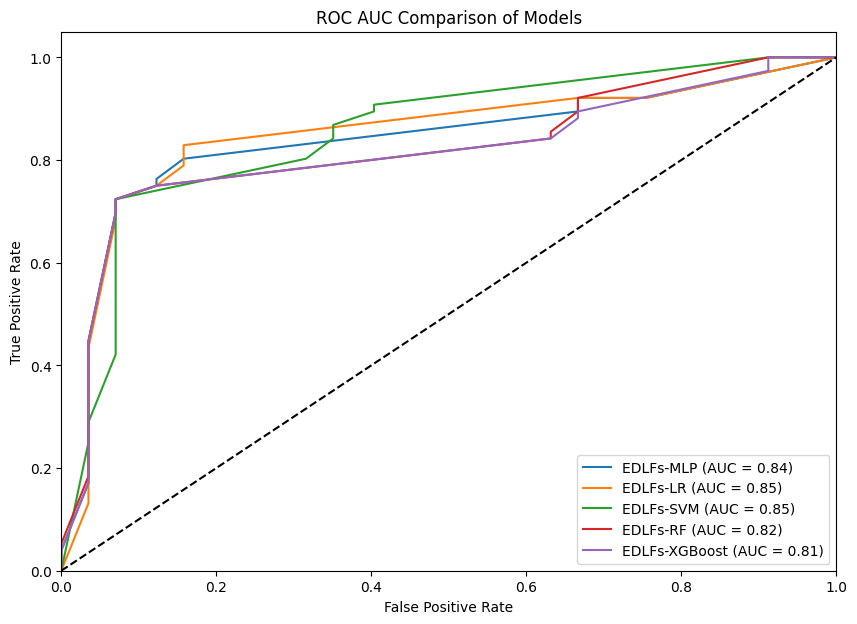

In [ ]:
# -----------------------------
# Step 3: Plot ROC AUC comparison
# -----------------------------
plt.figure(figsize=(10, 7))

label_map = {
    'y_pred_RandomForest': 'EDLFs-RF',
    'y_pred_LR': 'EDLFs-LR',
    'y_pred_MLP': 'EDLFs-MLP',
    'y_pred_XGBoost': 'EDLFs-XGBoost',
    'y_pred_SVM': 'EDLFs-SVM'
}

for model_key, probs in y_pred_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    model_label = label_map.get(model_key, model_key)
    plt.plot(fpr, tpr, label=f'{model_label} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Comparison of Models')
plt.legend(loc='lower right')
plt.show()


In [ ]:

best_lr = grid.best_estimator_

y_pred_train_lr = best_lr.predict_proba(X_train)[:, 1]
y_pred_test_lr  = best_lr.predict_proba(X_test)[:, 1]


In [ ]:
df_edlfs_train

,Clip_name,Link,Path_ID,PitchAnomaly,PauseAnomaly,BurstsAnomaly,IntakeOrOuttakeofBreath,SoundQualityAnomay,Type,y_true,Unnamed: 10
0,DF_E_2000055.wav,https://drive.google.com/file/d/1VHGwmg1ZwP4v7...,/content/drive/MyDrive/MySelfVersionProjects/a...,1,0,1,0,1,vc,1,NaN
1,DF_E_2000137.wav,https://drive.google.com/file/d/1x0aXd77XjI30Z...,/content/drive/MyDrive/MySelfVersionProjects/a...,0,0,0,0,1,vc,1,NaN
2,DF_E_2090179.wav,https://drive.google.com/file/d/1GClb7MjaoqR5V...,/content/drive/MyDrive/MySelfVersionProjects/a...,1,0,0,1,1,vc,1,NaN
3,DF_E_2000212.wav,https://drive.google.com/file/d/1N1HHF9U-SwMKk...,/content/drive/MyDrive/MySelfVersionProjects/a...,0,0,0,1,1,vc,1,NaN
4,DF_E_2000329.wav,https://drive.google.com/file/d/1lWdRgGyBhVpjC...,/content/drive/MyDrive/MySelfVersionProjects/a...,1,0,0,0,1,vc,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
728,DF_E_2001230.wav,https://drive.google.com/file/d/1MPYpoo2BCeiG8...,/content/drive/MyDrive/MySelfVersionProjects/a...,1,0,0,1,0,genuine,0,NaN
729,DF_E_2002202.wav,https://drive.google.com/file/d/1hMTyUGbqv5-T6...,/content/drive/MyDrive/MySelfVersionProjects/a...,0,0,0,0,1,genuine,0,NaN
730,DF_E_2002152.wav,https://drive.google.com/file/d/1itn0MYnlYglU3...,/content/drive/MyDrive/MySelfVersionProjects/a...,0,0,0,0,1,genuine,0,NaN
731,DF_E_2002420.wav,https://drive.google.com/file/d/1z-TB3t1lJJ0-o...,/content/drive/MyDrive/MySelfVersionProjects/a...,0,0,0,1,0,genuine,0,NaN


In [ ]:
y_pred_train_lr
y_pred_test_lr


array([0.09355862, 0.20379615, 0.9526097 , 0.21397899, 0.09355862,
       0.21397899, 0.30803677, 0.9526097 , 0.21397899, 0.21397899,
       0.09355862, 0.09355862, 0.09355862, 0.09355862, 0.21397899,
       0.21397899, 0.21397899, 0.21397899, 0.21397899, 0.21397899,
       0.21397899, 0.21397899, 0.21397899, 0.09355862, 0.21397899,
       0.21397899, 0.21397899, 0.21397899, 0.21397899, 0.09355862,
       0.21397899, 0.30803677, 0.0278049 , 0.0278049 , 0.21397899,
       0.0278049 , 0.21397899, 0.09355862, 0.0278049 , 0.30803677,
       0.21397899, 0.21397899, 0.09355862, 0.21397899, 0.21397899,
       0.21397899, 0.09355862, 0.21397899, 0.09355862, 0.21397899,
       0.21397899, 0.09355862, 0.09355862, 0.09355862, 0.09355862,
       0.8053239 , 0.07676705, 0.88153815, 0.21397899, 0.09355862,
       0.07676705, 0.8053239 , 0.8053239 , 0.8053239 , 0.21397899,
       0.09355862, 0.8053239 , 0.8053239 , 0.8053239 , 0.8053239 ,
       0.9526097 , 0.8053239 , 0.9526097 , 0.9930195 , 0.80532

In [ ]:
df_edlfs_train['y_pred_train_lr']= y_pred_train_lr

In [ ]:
df_edlfs_test['y_pred_test_lr']= y_pred_test_lr

In [ ]:
df_edlfs_test.to_excel('final_test.xlsx')
# will be in the sheet of the excel file SARA_CURRENT_2_6_2026_DATASET_EDLFs.xlsx

In [ ]:
df_edlfs_train.to_excel('final_train.xlsx')
# will be in the sheet of the excel file SARA_CURRENT_2_6_2026_DATASET_EDLFs.xlsx

## SSL and VGGish models ensemble with EDLF-based model

In [ ]:
import pandas as pd
import re

# Function to clean clip names
def clean_clipname(name):
    if not isinstance(name, str):
        return name
    # Remove leading/trailing spaces
    name = name.strip()
    # Remove file extensions at the end
    name = re.sub(r'\.(wav|flac)$', '', name, flags=re.IGNORECASE)
    # Remove spaces, underscores, hyphens, and parentheses
    name = re.sub(r'[\s_\-\(\)]', '', name)
    # Optional: remove any other non-alphanumeric characters (keep letters & digits)
    name = re.sub(r'[^A-Za-z0-9]', '', name)
    return name

# Apply cleaning to ClipID column
df_edlfs_test['Clip_name'] = df_edlfs_test['Clip_name'].apply(clean_clipname)


In [ ]:

df_edlfs_test.rename(columns={'Clip_name': 'ClipID'}, inplace=True)


In [ ]:

df_ssl = pd.read_excel('/content/drive/MyDrive/MySelfVersionProjects/datasets/EDLFs_data_paper/edlfs_and_baselines.xlsx', sheet_name='SSL_models')


In [ ]:
df_edlfs_test.columns

Index(['ClipID', 'Path_ID', 'PitchAnomaly', 'PauseAnomaly', 'BurstsAnomaly',
       'IntakeOrOuttakeofBreath', 'SoundQualityAnomay', 'Type', 'y_true',
       'Unnamed: 9', 'Unnamed: 10', 'y_pred_test_lr'],
      dtype='object')

In [ ]:
df_subset = df_edlfs_test[["ClipID", "y_pred_test_lr"]]

In [ ]:
df_merged2 = pd.merge(df_ssl, df_subset, on='ClipID', how='left')

In [ ]:
df_merged2.drop_duplicates(subset=['ClipID'], inplace=True)

In [ ]:
# will be a sheet of edlfs_and_baselines
df_merged2.to_excel('df_merged2.xlsx')

In [ ]:
df_merged2 = pd.read_excel('/content/drive/MyDrive/MySelfVersionProjects/datasets/EDLFs_data_paper/edlfs_and_baselines.xlsx', sheet_name='SSL_models_Vggish_and_edlfs')

In [ ]:
df = df_merged2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve


In [ ]:
def find_best_weights_nan_safe(y_true, p1, p2, n_steps=101):
    tmp = pd.DataFrame({
        "y_true": y_true,
        "p1": p1,
        "p2": p2
    }).dropna()

    y = tmp["y_true"].values
    p1 = tmp["p1"].values
    p2 = tmp["p2"].values

    weights = np.linspace(0, 1, n_steps)
    best_auc = -1
    best_w1, best_w2 = None, None
    best_scores = None

    for w1 in weights:
        w2 = 1 - w1
        scores = w1 * p1 + w2 * p2
        auc = roc_auc_score(y, scores)

        if auc > best_auc:
            best_auc = auc
            best_w1 = w1
            best_w2 = w2
            best_scores = scores

    return best_w1, best_w2, best_auc, best_scores, y


In [ ]:
y_true = df["y_true"]

results = {}
roc_data = {}


In [ ]:
w1, w2, auc, scores, y = find_best_weights_nan_safe(
    df["y_true"],
    df["y_pred_test_lr"],
    df["y_pred_mlp_test_encoded_xlsr_only"]
)


In [ ]:
w1

np.float64(0.45)

In [ ]:
w1, w2, auc, scores, y = find_best_weights_nan_safe(
    df["y_true"],
    df["y_pred_test_lr"],
    df["y_pred_mlp_test_encoded_xlsr_only"]
)

results["EDLFs-LR + XLSR"] = (w1, w2, auc)
roc_data["EDLFs-LR + XLSR"] = roc_curve(y, scores)


In [ ]:
w1

np.float64(0.45)

In [ ]:
w1, w2, auc, scores, y = find_best_weights_nan_safe(
    df["y_true"],
    df["y_pred_test_lr"],
    df["HuBERT_encoded_MLP_probs"]
)

results["EDLFs-LR + HuBERT"] = (w1, w2, auc)
roc_data["EDLFs-LR + HuBERT"] = roc_curve(y, scores)


In [ ]:
w1, w2, auc, scores, y = find_best_weights_nan_safe(
    df["y_true"],
    df["y_pred_test_lr"],
    df["VGGish_MLP_probs"]
)

results["EDLFs-LR + VGGish"] = (w1, w2, auc)
roc_data["EDLFs-LR + VGGish"] = roc_curve(y, scores)


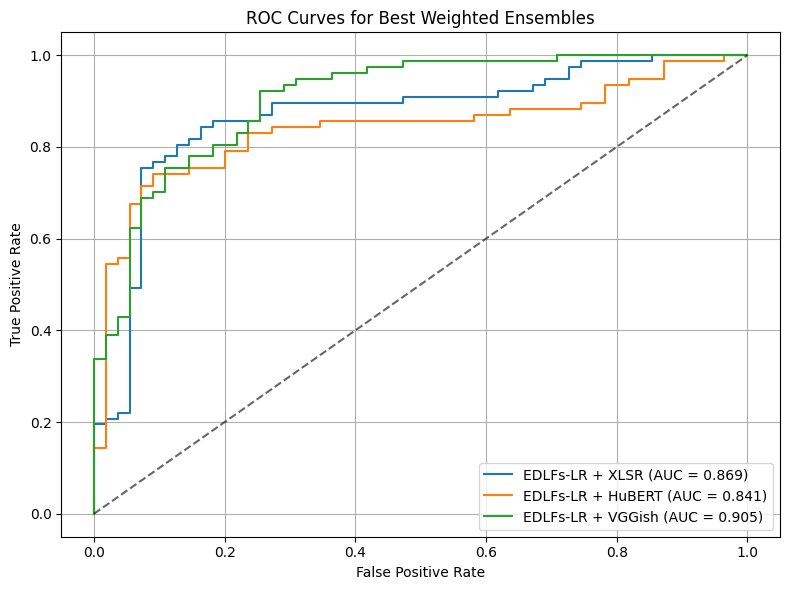

In [ ]:
plt.figure(figsize=(8, 6))

for name, (fpr, tpr, _) in roc_data.items():
    auc = results[name][2]
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], "k--", alpha=0.6)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Best Weighted Ensembles")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
cols_needed = [
    "y_true",
    "y_pred_test_lr",
    "VGGish_MLP_probs",
    "HuBERT_encoded_MLP_probs",
    "y_pred_mlp_test_encoded_xlsr_only"
]

df_eval = df[cols_needed].dropna()

y = df_eval["y_true"].values


In [ ]:
def best_ensemble_scores(y, p_lr, p_other, n_steps=101):
    weights = np.linspace(0, 1, n_steps)
    best_auc = -1
    best_scores = None

    for w in weights:
        scores = w * p_lr + (1 - w) * p_other
        auc = roc_auc_score(y, scores)
        if auc > best_auc:
            best_auc = auc
            best_scores = scores

    return best_scores, best_auc


In [ ]:
# Individual model probs
p_vgg = df_eval["VGGish_MLP_probs"].values
p_hubert = df_eval["HuBERT_encoded_MLP_probs"].values
p_xlsr = df_eval["y_pred_mlp_test_encoded_xlsr_only"].values
p_lr = df_eval["y_pred_test_lr"].values

# Ensembles
ens_vgg, auc_ens_vgg = best_ensemble_scores(y, p_lr, p_vgg)
ens_hubert, auc_ens_hubert = best_ensemble_scores(y, p_lr, p_hubert)
ens_xlsr, auc_ens_xlsr = best_ensemble_scores(y, p_lr, p_xlsr)


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

roc_data = {
    "VGGish": (*roc_curve(y, p_vgg), roc_auc_score(y, p_vgg)),
    "HuBERT": (*roc_curve(y, p_hubert), roc_auc_score(y, p_hubert)),
    "XLSR": (*roc_curve(y, p_xlsr), roc_auc_score(y, p_xlsr)),
    "EDLFs-LR + VGGish": (*roc_curve(y, ens_vgg), auc_ens_vgg),
    "EDLFs-LR + HuBERT": (*roc_curve(y, ens_hubert), auc_ens_hubert),
    "EDLFs-LR + XLSR": (*roc_curve(y, ens_xlsr), auc_ens_xlsr),
}


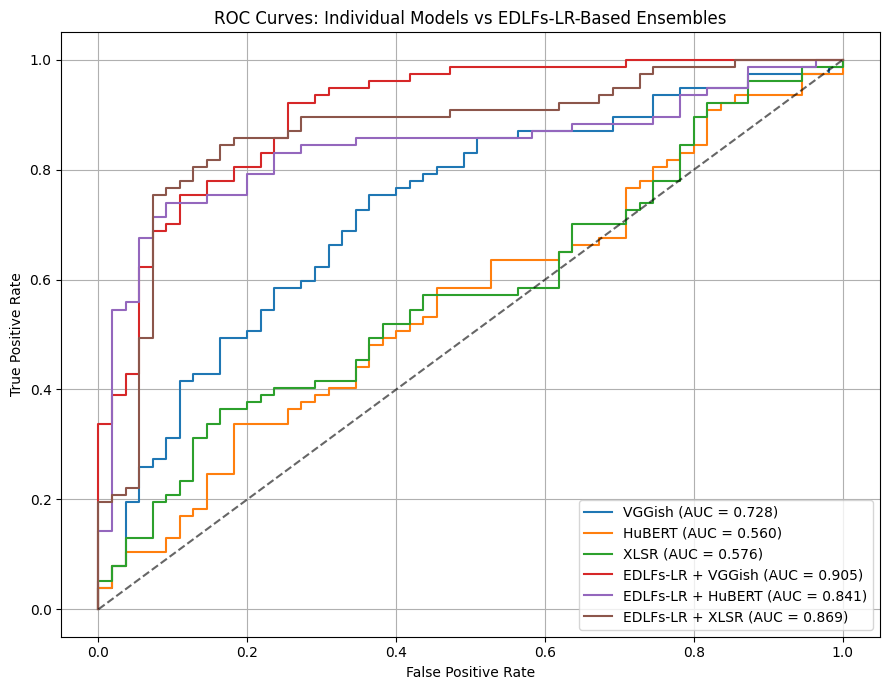

In [ ]:
plt.figure(figsize=(9, 7), dpi=100)

for name, (fpr, tpr, _, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], "k--", alpha=0.6)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves: Individual Models vs EDLFs-LR-Based Ensembles")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

roc_data = {
    "VGGish-MLP": (*roc_curve(y, p_vgg), roc_auc_score(y, p_vgg)),
    "HuBERT-MLP": (*roc_curve(y, p_hubert), roc_auc_score(y, p_hubert)),
    "XLSR-MLP": (*roc_curve(y, p_xlsr), roc_auc_score(y, p_xlsr)),
    "EDLFs-LR": (*roc_curve(y, p_lr), roc_auc_score(y, p_lr)),
    "EDLFs-LR + VGGish": (*roc_curve(y, ens_vgg), auc_ens_vgg),
    "EDLFs-LR + HuBERT": (*roc_curve(y, ens_hubert), auc_ens_hubert),
    "EDLFs-LR + XLSR": (*roc_curve(y, ens_xlsr), auc_ens_xlsr),
}


BELOW_graph

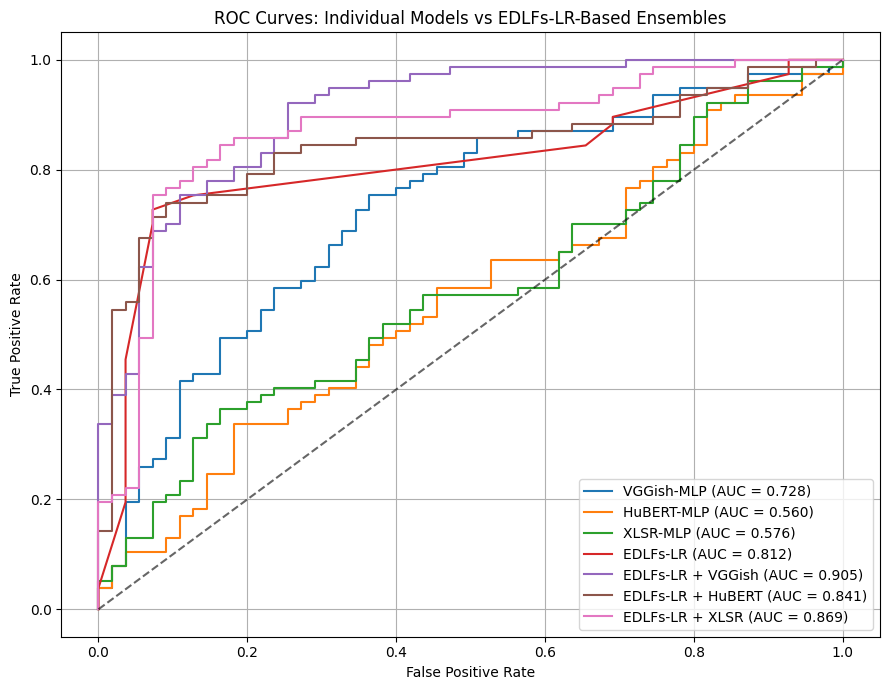

In [ ]:
plt.figure(figsize=(9, 7), dpi=100)

for name, (fpr, tpr, _, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], "k--", alpha=0.6)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves: Individual Models vs EDLFs-LR-Based Ensembles")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
plt.savefig("roc_ensemble_plot.png", dpi=300, transparent=True)


<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Use the same NaN-free subset as before
cols_needed = [
    "y_true",
    "y_pred_test_lr",
    "VGGish_MLP_probs",
    "HuBERT_encoded_MLP_probs",
    "y_pred_mlp_test_encoded_xlsr_only"
]

df_eval = df[cols_needed].dropna()
y = df_eval["y_true"].values

# Individual models
p_vgg = df_eval["VGGish_MLP_probs"].values
p_hubert = df_eval["HuBERT_encoded_MLP_probs"].values
p_xlsr = df_eval["y_pred_mlp_test_encoded_xlsr_only"].values
p_lr = df_eval["y_pred_test_lr"].values

from sklearn.metrics import roc_auc_score

# Individual model AUCs
auc_vgg = roc_auc_score(y, p_vgg)
auc_hubert = roc_auc_score(y, p_hubert)
auc_xlsr = roc_auc_score(y, p_xlsr)

# Ensembles: LR + model
def best_ensemble_auc(y, p_lr, p_other, n_steps=101):
    weights = np.linspace(0, 1, n_steps)
    best_auc = -1
    for w in weights:
        scores = w * p_lr + (1 - w) * p_other
        auc = roc_auc_score(y, scores)
        if auc > best_auc:
            best_auc = auc
    return best_auc

auc_ens_vgg = best_ensemble_auc(y, p_lr, p_vgg)
auc_ens_hubert = best_ensemble_auc(y, p_lr, p_hubert)
auc_ens_xlsr = best_ensemble_auc(y, p_lr, p_xlsr)


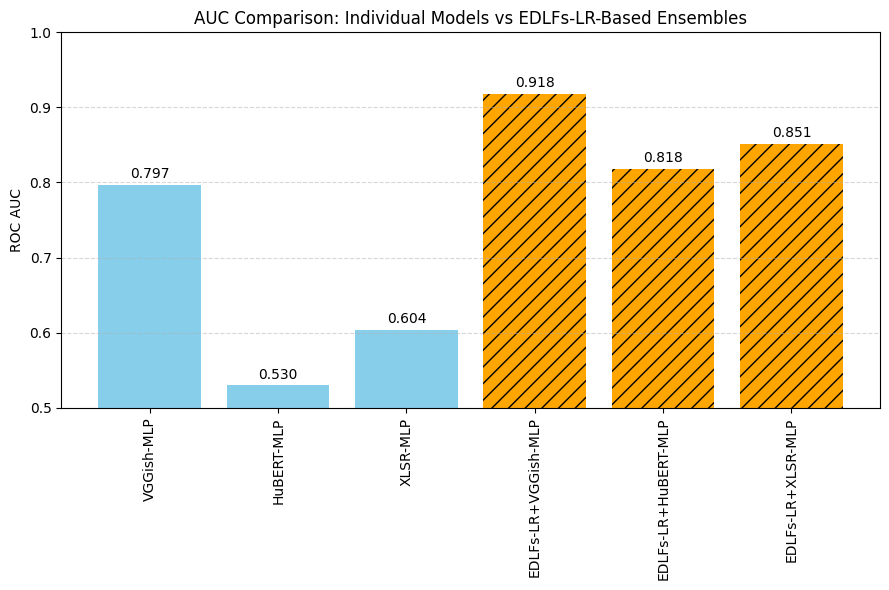

In [ ]:
plt.figure(figsize=(9, 6), dpi=100)

# Define colors and hatches for single models vs ensembles
colors = ["skyblue", "skyblue", "skyblue", "orange", "orange", "orange"]
hatches = ["", "", "", "//", "//", "//"]  # no hatch for singles, slashes for ensembles

bars = plt.bar(names, aucs, color=colors)

# Apply hatching manually
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

# Add text labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.005, f"{height:.3f}",
             ha="center", va="bottom", fontsize=10)

# Vertical x-axis labels
plt.xticks(rotation=90)

plt.ylim(0.5, 1)  # adjust depending on your AUC range
plt.ylabel("ROC AUC")
plt.title("AUC Comparison: Individual Models vs EDLFs-LR-Based Ensembles")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
plt.savefig("roc_ensemble_plot_bar_chart.png", dpi=300, transparent=True)

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

cols_needed = [
    "y_true",
    "y_pred_test_lr",               # EDLFs-LR
    "VGGish_MLP_probs",
    "HuBERT_encoded_MLP_probs",
    "y_pred_mlp_test_encoded_xlsr_only"
]

df_eval = df[cols_needed].dropna()
y = df_eval["y_true"].values

# Individual model predictions
p_lr = df_eval["y_pred_test_lr"].values
p_vgg = df_eval["VGGish_MLP_probs"].values
p_hubert = df_eval["HuBERT_encoded_MLP_probs"].values
p_xlsr = df_eval["y_pred_mlp_test_encoded_xlsr_only"].values


In [ ]:
roc_data = {
    "EDLFs-LR": (*roc_curve(y, p_lr), roc_auc_score(y, p_lr)),
    "VGGish": (*roc_curve(y, p_vgg), roc_auc_score(y, p_vgg)),
    "HuBERT": (*roc_curve(y, p_hubert), roc_auc_score(y, p_hubert)),
    "XLSR": (*roc_curve(y, p_xlsr), roc_auc_score(y, p_xlsr)),
}


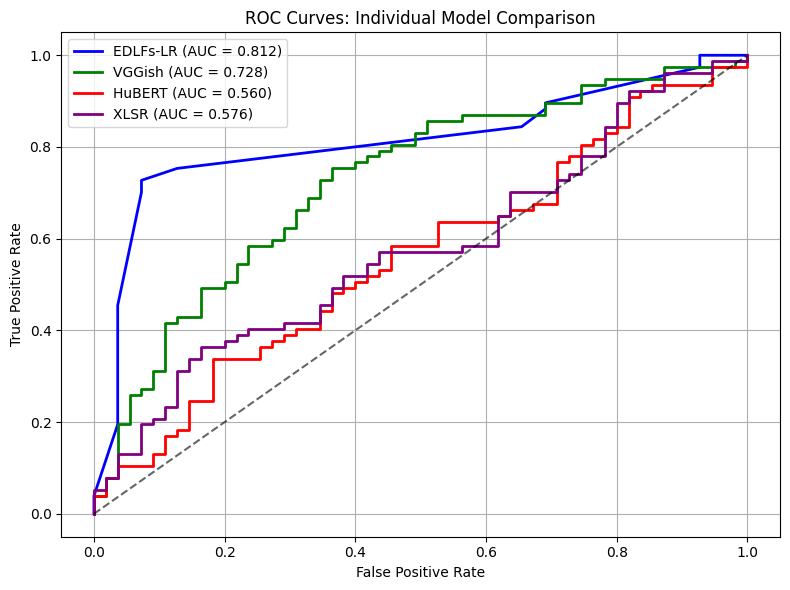

In [ ]:
plt.figure(figsize=(8, 6), dpi=100)

colors = ["blue", "green", "red", "purple"]

for (name, (fpr, tpr, _, auc)), color in zip(roc_data.items(), colors):
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})", color=color, linewidth=2)

# Diagonal reference
plt.plot([0, 1], [0, 1], "k--", alpha=0.6)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves: Individual Model Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

cols_needed = [
    "y_true",
    "y_pred_test_lr",               # EDLFs-LR
    "VGGish_MLP_probs",
    "HuBERT_encoded_MLP_probs",
    "y_pred_mlp_test_encoded_xlsr_only"
]

df_eval = df[cols_needed].dropna()
y = df_eval["y_true"].values

auc_lr = roc_auc_score(y, df_eval["y_pred_test_lr"])
auc_vgg = roc_auc_score(y, df_eval["VGGish_MLP_probs"])
auc_hubert = roc_auc_score(y, df_eval["HuBERT_encoded_MLP_probs"])
auc_xlsr = roc_auc_score(y, df_eval["y_pred_mlp_test_encoded_xlsr_only"])


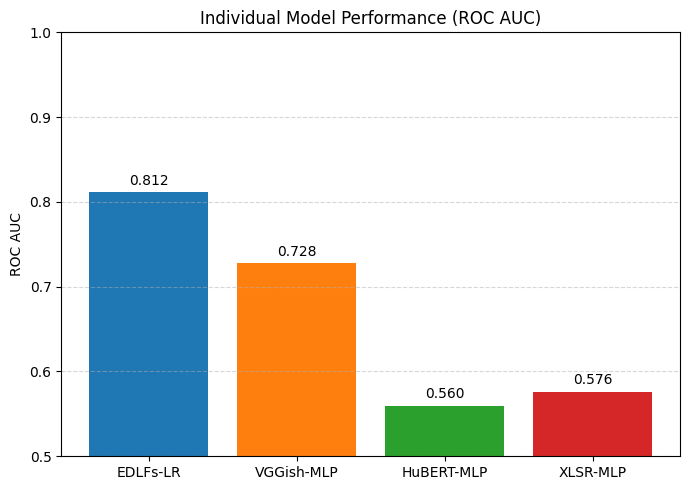

In [ ]:
names = ["EDLFs-LR", "VGGish-MLP", "HuBERT-MLP", "XLSR-MLP"]
aucs = [auc_lr, auc_vgg, auc_hubert, auc_xlsr]

plt.figure(figsize=(7, 5), dpi=100)

bars = plt.bar(
    names,
    aucs,
    color=["tab:blue", "tab:orange", "tab:green", "tab:red"],
)

# Add AUC values on top
for bar in bars:
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        h + 0.005,
        f"{h:.3f}",
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.ylim(0.5, 1.0)   # adjust if needed
plt.ylabel("ROC AUC")
plt.title("Individual Model Performance (ROC AUC)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

cols_needed = [
    "y_true",
    "y_pred_test_lr",               # EDLFs-LR
    "VGGish_MLP_probs",
    "HuBERT_encoded_MLP_probs",
    "y_pred_mlp_test_encoded_xlsr_only"
]

df_eval = df[cols_needed].dropna()
y = df_eval["y_true"].values


In [ ]:
threshold = 0.5

preds = {
    "EDLFs-LR": (df_eval["y_pred_test_lr"].values >= threshold).astype(int),
    "VGGish-MLP": (df_eval["VGGish_MLP_probs"].values >= threshold).astype(int),
    "HuBERT-MLP": (df_eval["HuBERT_encoded_MLP_probs"].values >= threshold).astype(int),
    "XLSR-MLP": (df_eval["y_pred_mlp_test_encoded_xlsr_only"].values >= threshold).astype(int),
}


In [ ]:
accuracy = {name: accuracy_score(y, p) for name, p in preds.items()}
f1 = {name: f1_score(y, p) for name, p in preds.items()}


In [ ]:
names = list(accuracy.keys())
acc_values = list(accuracy.values())

plt.figure(figsize=(7, 5), dpi=100)

bars = plt.bar(
    names,
    acc_values,
    color=["tab:blue", "tab:orange", "tab:green", "tab:red"],
)

for bar in bars:
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        h + 0.005,
        f"{h:.3f}",
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Individual Model Accuracy Comparison")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
f1_values = list(f1.values())

plt.figure(figsize=(7, 5), dpi=100)

bars = plt.bar(
    names,
    f1_values,
    color=["tab:blue", "tab:orange", "tab:green", "tab:red"],
)

for bar in bars:
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        h + 0.005,
        f"{h:.3f}",
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.ylim(0, 1)
plt.ylabel("F1 Score")
plt.title("Individual Model F1-Score Comparison")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


w1

## Dropping Analysis

In [ ]:
df_edlfs_train = pd.read_excel('/content/drive/MyDrive/MySelfVersionProjects/datasets/EDLFs_data_paper/SARA_CURRENT_2_6_2026_DATASET_EDLFs.xlsx', sheet_name='Train')

In [ ]:
df_edlfs_test = pd.read_excel('/content/drive/MyDrive/MySelfVersionProjects/datasets/EDLFs_data_paper/SARA_CURRENT_2_6_2026_DATASET_EDLFs.xlsx', sheet_name='Test')

Training MLP...
Training LR...
Training SVM...
Training RandomForest...
Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:03:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


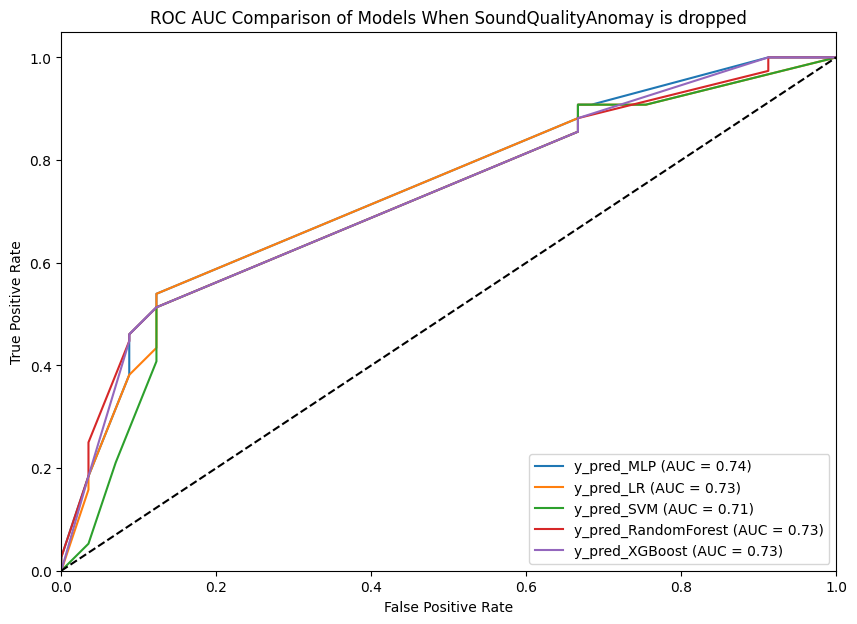

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

# -----------------------------
# Step 0: Drop NaNs
# -----------------------------
features = ['PitchAnomaly', 'PauseAnomaly', 'BurstsAnomaly',
            'IntakeOrOuttakeofBreath']

train_data = df_edlfs_train.dropna(subset=features + ['y_true']).copy()
test_data = df_edlfs_test.dropna(subset=features + ['y_true']).copy()

X_train = train_data[features].apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(train_data['y_true'], errors='coerce')
X_test = test_data[features].apply(pd.to_numeric, errors='coerce')
y_test = pd.to_numeric(test_data['y_true'], errors='coerce')

# Drop any rows that became NaN after conversion
train_clean = X_train.join(y_train).dropna()
X_train = train_clean[features]
y_train = train_clean['y_true']

test_clean = X_test.join(y_test).dropna()
X_test = test_clean[features]
y_test = test_clean['y_true']

# -----------------------------
# Step 1: Define models and param grids
# -----------------------------
models = {
    'MLP': MLPClassifier(max_iter=500, random_state=42),
    'LR': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

param_grids = {
    'MLP': {'mlp__hidden_layer_sizes': [(50,), (100,)], 'mlp__alpha': [0.0001, 0.001]},
    'LR': {'lr__C': [0.1, 1, 10], 'lr__penalty': ['l2']},
    'SVM': {'svm__C': [0.1, 1, 10], 'svm__kernel': ['linear', 'rbf']},
    'XGBoost': {'xgboost__n_estimators': [100, 200], 'xgboost__max_depth': [3, 6], 'xgboost__learning_rate': [0.01, 0.1]}
}

# -----------------------------
# Step 2: Train models and save probabilities
# -----------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_probs = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    step_name = model_name.lower()

    # Scaling only for models that need it
    if model_name in ['MLP', 'LR', 'SVM']:
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            (step_name, model)
        ])
    else:
        # RandomForest and XGBoost
        pipe = Pipeline([
            (step_name, model)
        ])

    # Only use GridSearchCV for MLP, LR, SVM, XGBoost
    if model_name != 'RandomForest':
        param_grid = param_grids[model_name]
        grid = GridSearchCV(pipe, param_grid, cv=skf, scoring='roc_auc', n_jobs=-1, error_score='raise')
        grid.fit(X_train, y_train)
        y_pred_probs[f'y_pred_{model_name}'] = grid.predict_proba(X_test)[:,1]
    else:
        # RandomForest: just fit with default parameters
        pipe.fit(X_train, y_train)
        y_pred_probs[f'y_pred_{model_name}'] = pipe.predict_proba(X_test)[:,1]

# -----------------------------
# Step 3: Plot ROC AUC comparison
# -----------------------------
plt.figure(figsize=(10, 7))

for model_name, probs in y_pred_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Comparison of Models When SoundQualityAnomay is dropped')
plt.legend(loc='lower right')
plt.show()


Training MLP...
Training LR...
Training SVM...
Training RandomForest...
Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:57:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


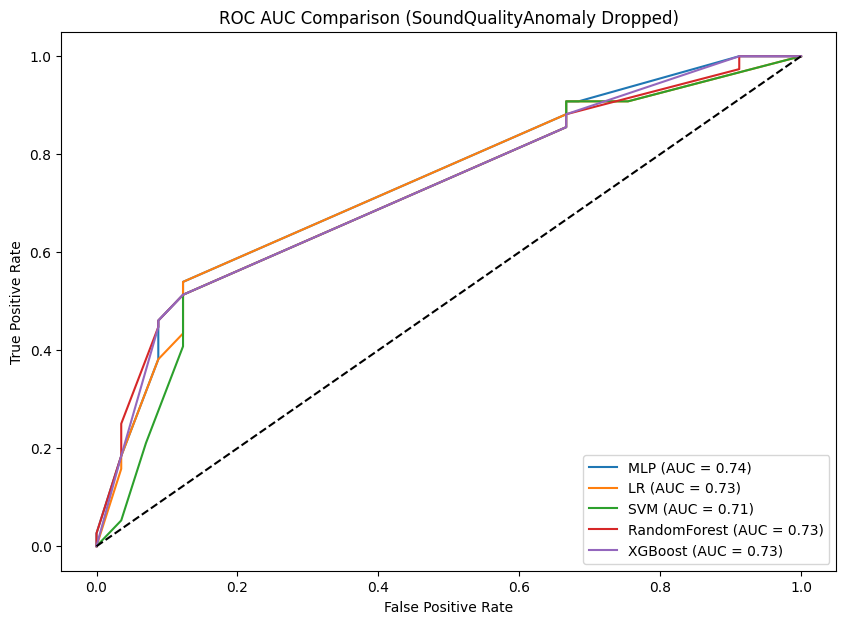


Logistic Regression (threshold = 0.5)
Accuracy: 0.684
AUC:      0.732
FPR:      0.123
TPR:      0.539

Best Logistic Regression hyperparameters:
Penalty:   l2
C:         0.1
Solver:    lbfgs
Max_iter:  1000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    roc_curve, roc_auc_score, accuracy_score, confusion_matrix
)
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# -----------------------------
# Step 0: Drop NaNs
# -----------------------------
features = [
    'PitchAnomaly',
    'PauseAnomaly',
    'BurstsAnomaly',
    'IntakeOrOuttakeofBreath'
]

train_data = df_edlfs_train.dropna(subset=features + ['y_true']).copy()
test_data = df_edlfs_test.dropna(subset=features + ['y_true']).copy()

X_train = train_data[features].apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(train_data['y_true'], errors='coerce')
X_test = test_data[features].apply(pd.to_numeric, errors='coerce')
y_test = pd.to_numeric(test_data['y_true'], errors='coerce')

train_clean = X_train.join(y_train).dropna()
X_train = train_clean[features]
y_train = train_clean['y_true']

test_clean = X_test.join(y_test).dropna()
X_test = test_clean[features]
y_test = test_clean['y_true']

# -----------------------------
# Step 1: Models & grids
# -----------------------------
models = {
    'MLP': MLPClassifier(max_iter=500, random_state=42),
    'LR': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
}

param_grids = {
    'MLP': {
        'mlp__hidden_layer_sizes': [(50,), (100,)],
        'mlp__alpha': [0.0001, 0.001]
    },
    'LR': {
        'lr__C': [0.1, 1, 10],
        'lr__penalty': ['l2']
    },
    'SVM': {
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['linear', 'rbf']
    },
    'XGBoost': {
        'xgboost__n_estimators': [100, 200],
        'xgboost__max_depth': [3, 6],
        'xgboost__learning_rate': [0.01, 0.1]
    }
}

# -----------------------------
# Step 2: Training
# -----------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grids = {}
best_estimators = {}
y_pred_probs = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    step_name = model_name.lower()

    if model_name in ['MLP', 'LR', 'SVM']:
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            (step_name, model)
        ])
    else:
        pipe = Pipeline([
            (step_name, model)
        ])

    if model_name != 'RandomForest':
        grid = GridSearchCV(
            pipe,
            param_grids[model_name],
            cv=skf,
            scoring='roc_auc',
            n_jobs=-1
        )
        grid.fit(X_train, y_train)

        grids[model_name] = grid
        best_estimators[model_name] = grid.best_estimator_
        y_pred_probs[model_name] = grid.predict_proba(X_test)[:, 1]

    else:
        pipe.fit(X_train, y_train)
        best_estimators[model_name] = pipe
        y_pred_probs[model_name] = pipe.predict_proba(X_test)[:, 1]

# -----------------------------
# Step 3: ROC curves (all models)
# -----------------------------
plt.figure(figsize=(10, 7))

for model_name, probs in y_pred_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Comparison (SoundQualityAnomaly Dropped)')
plt.legend(loc='lower right')
plt.show()

# ======================================================
# Step 4: Logistic Regression metrics (threshold = 0.5)
# ======================================================
best_lr = best_estimators['LR']

# Sanity check
from sklearn.linear_model import LogisticRegression
assert isinstance(
    best_lr.named_steps['lr'], LogisticRegression
)

y_prob_lr = best_lr.predict_proba(X_test)[:, 1]
y_pred_lr = (y_prob_lr >= 0.5).astype(int)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
fpr_05 = fp / (fp + tn)
tpr_05 = tp / (tp + fn)

print("\nLogistic Regression (threshold = 0.5)")
print(f"Accuracy: {accuracy_lr:.3f}")
print(f"AUC:      {auc_lr:.3f}")
print(f"FPR:      {fpr_05:.3f}")
print(f"TPR:      {tpr_05:.3f}")

# -----------------------------
# Step 5: Report LR hyperparameters
# -----------------------------
lr_params = best_lr.named_steps['lr'].get_params()

print("\nBest Logistic Regression hyperparameters:")
print(f"Penalty:   {lr_params['penalty']}")
print(f"C:         {lr_params['C']}")
print(f"Solver:    {lr_params['solver']}")
print(f"Max_iter:  {lr_params['max_iter']}")


In [ ]:
best_lr = grid.best_estimator_

y_prob_lr = best_lr.predict_proba(X_test)[:, 1]
y_pred_lr = (y_prob_lr >= 0.5).astype(int)


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix

# ROC-related
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

# Scalar metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()

# FPR / TPR at threshold = 0.5
fpr_05 = fp / (fp + tn)
tpr_05 = tp / (tp + fn)


In [ ]:
print("Logistic Regression (threshold = 0.5)")
print(f"  Accuracy: {accuracy_lr:.3f}")
print(f"  AUC:      {auc_lr:.3f}")
print(f"  FPR:      {fpr_05:.3f}")
print(f"  TPR:      {tpr_05:.3f}")


Logistic Regression (threshold = 0.5)
  Accuracy: 0.647
  AUC:      0.728
  FPR:      0.667
  TPR:      0.882


In [ ]:
best_lr = grid.best_estimator_
best_lr_params = best_lr.named_steps['lr'].get_params()

print("Best Logistic Regression hyperparameters:")
print(f"  C: {best_lr_params['C']}")
print(f"  penalty: {best_lr_params['penalty']}")
print(f"  solver: {best_lr_params['solver']}")
print(f"  max_iter: {best_lr_params['max_iter']}")


KeyError: 'lr'

Training MLP...
Training LR...
Training SVM...
Training RandomForest...
Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:38:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


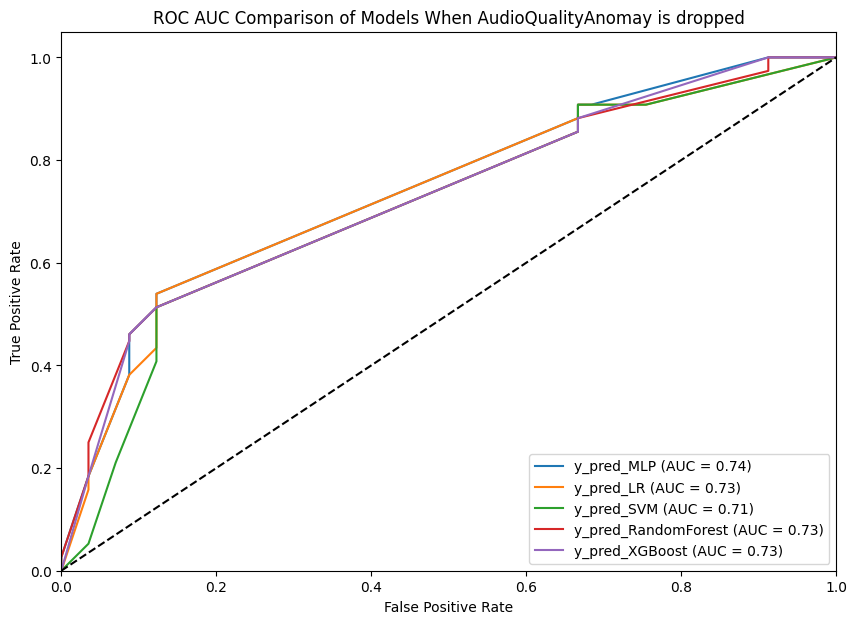

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

# -----------------------------
# Step 0: Drop NaNs
# -----------------------------
features = ['PitchAnomaly', 'PauseAnomaly', 'BurstsAnomaly',
            'IntakeOrOuttakeofBreath']

train_data = df_edlfs_train.dropna(subset=features + ['y_true']).copy()
test_data = df_edlfs_test.dropna(subset=features + ['y_true']).copy()

X_train = train_data[features].apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(train_data['y_true'], errors='coerce')
X_test = test_data[features].apply(pd.to_numeric, errors='coerce')
y_test = pd.to_numeric(test_data['y_true'], errors='coerce')

# Drop any rows that became NaN after conversion
train_clean = X_train.join(y_train).dropna()
X_train = train_clean[features]
y_train = train_clean['y_true']

test_clean = X_test.join(y_test).dropna()
X_test = test_clean[features]
y_test = test_clean['y_true']

# -----------------------------
# Step 1: Define models and param grids
# -----------------------------
models = {
    'MLP': MLPClassifier(max_iter=500, random_state=42),
    'LR': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

param_grids = {
    'MLP': {'mlp__hidden_layer_sizes': [(50,), (100,)], 'mlp__alpha': [0.0001, 0.001]},
    'LR': {'lr__C': [0.1, 1, 10], 'lr__penalty': ['l2']},
    'SVM': {'svm__C': [0.1, 1, 10], 'svm__kernel': ['linear', 'rbf']},
    'XGBoost': {'xgboost__n_estimators': [100, 200], 'xgboost__max_depth': [3, 6], 'xgboost__learning_rate': [0.01, 0.1]}
}

# -----------------------------
# Step 2: Train models and save probabilities
# -----------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_probs = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    step_name = model_name.lower()

    # Scaling only for models that need it
    if model_name in ['MLP', 'LR', 'SVM']:
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            (step_name, model)
        ])
    else:
        # RandomForest and XGBoost
        pipe = Pipeline([
            (step_name, model)
        ])

    # Only use GridSearchCV for MLP, LR, SVM, XGBoost
    if model_name != 'RandomForest':
        param_grid = param_grids[model_name]
        grid = GridSearchCV(pipe, param_grid, cv=skf, scoring='roc_auc', n_jobs=-1, error_score='raise')
        grid.fit(X_train, y_train)
        y_pred_probs[f'y_pred_{model_name}'] = grid.predict_proba(X_test)[:,1]
    else:
        # RandomForest: just fit with default parameters
        pipe.fit(X_train, y_train)
        y_pred_probs[f'y_pred_{model_name}'] = pipe.predict_proba(X_test)[:,1]

# -----------------------------
# Step 3: Plot ROC AUC comparison
# -----------------------------
plt.figure(figsize=(10, 7))

for model_name, probs in y_pred_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Comparison of Models When AudioQualityAnomay is dropped')
plt.legend(loc='lower right')
plt.show()


Training MLP...
Training LR...
Training SVM...
Training RandomForest...
Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:16:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


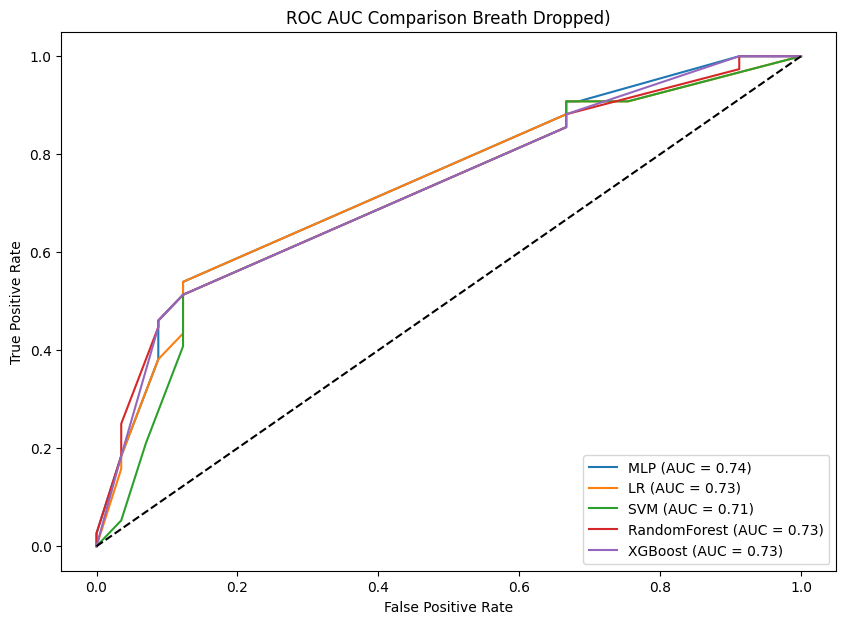


Logistic Regression (threshold = 0.5)
Accuracy: 0.684
AUC:      0.732
FPR:      0.123
TPR:      0.539

Best Logistic Regression hyperparameters:
Penalty:   l2
C:         0.1
Solver:    lbfgs
Max_iter:  1000


In [ ]:


# -----------------------------
# Step 0: Drop NaNs
# -----------------------------
features = [
    'PitchAnomaly',
    'PauseAnomaly',
    'BurstsAnomaly',
    'IntakeOrOuttakeofBreath'
]

train_data = df_edlfs_train.dropna(subset=features + ['y_true']).copy()
test_data = df_edlfs_test.dropna(subset=features + ['y_true']).copy()

X_train = train_data[features].apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(train_data['y_true'], errors='coerce')
X_test = test_data[features].apply(pd.to_numeric, errors='coerce')
y_test = pd.to_numeric(test_data['y_true'], errors='coerce')

train_clean = X_train.join(y_train).dropna()
X_train = train_clean[features]
y_train = train_clean['y_true']

test_clean = X_test.join(y_test).dropna()
X_test = test_clean[features]
y_test = test_clean['y_true']

# -----------------------------
# Step 1: Models & grids
# -----------------------------
models = {
    'MLP': MLPClassifier(max_iter=500, random_state=42),
    'LR': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
}

param_grids = {
    'MLP': {
        'mlp__hidden_layer_sizes': [(50,), (100,)],
        'mlp__alpha': [0.0001, 0.001]
    },
    'LR': {
        'lr__C': [0.1, 1, 10],
        'lr__penalty': ['l2']
    },
    'SVM': {
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['linear', 'rbf']
    },
    'XGBoost': {
        'xgboost__n_estimators': [100, 200],
        'xgboost__max_depth': [3, 6],
        'xgboost__learning_rate': [0.01, 0.1]
    }
}

# -----------------------------
# Step 2: Training
# -----------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grids = {}
best_estimators = {}
y_pred_probs = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    step_name = model_name.lower()

    if model_name in ['MLP', 'LR', 'SVM']:
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            (step_name, model)
        ])
    else:
        pipe = Pipeline([
            (step_name, model)
        ])

    if model_name != 'RandomForest':
        grid = GridSearchCV(
            pipe,
            param_grids[model_name],
            cv=skf,
            scoring='roc_auc',
            n_jobs=-1
        )
        grid.fit(X_train, y_train)

        grids[model_name] = grid
        best_estimators[model_name] = grid.best_estimator_
        y_pred_probs[model_name] = grid.predict_proba(X_test)[:, 1]

    else:
        pipe.fit(X_train, y_train)
        best_estimators[model_name] = pipe
        y_pred_probs[model_name] = pipe.predict_proba(X_test)[:, 1]

# -----------------------------
# Step 3: ROC curves (all models)
# -----------------------------
plt.figure(figsize=(10, 7))

for model_name, probs in y_pred_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Comparison Breath Dropped)')
plt.legend(loc='lower right')
plt.show()

# ======================================================
# Step 4: Logistic Regression metrics (threshold = 0.5)
# ======================================================
best_lr = best_estimators['LR']

# Sanity check
from sklearn.linear_model import LogisticRegression
assert isinstance(
    best_lr.named_steps['lr'], LogisticRegression
)

y_prob_lr = best_lr.predict_proba(X_test)[:, 1]
y_pred_lr = (y_prob_lr >= 0.5).astype(int)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
fpr_05 = fp / (fp + tn)
tpr_05 = tp / (tp + fn)

print("\nLogistic Regression (threshold = 0.5)")
print(f"Accuracy: {accuracy_lr:.3f}")
print(f"AUC:      {auc_lr:.3f}")
print(f"FPR:      {fpr_05:.3f}")
print(f"TPR:      {tpr_05:.3f}")

# -----------------------------
# Step 5: Report LR hyperparameters
# -----------------------------
lr_params = best_lr.named_steps['lr'].get_params()

print("\nBest Logistic Regression hyperparameters:")
print(f"Penalty:   {lr_params['penalty']}")
print(f"C:         {lr_params['C']}")
print(f"Solver:    {lr_params['solver']}")
print(f"Max_iter:  {lr_params['max_iter']}")


Training MLP...
Training LR...
Training SVM...
Training RandomForest...
Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:40:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


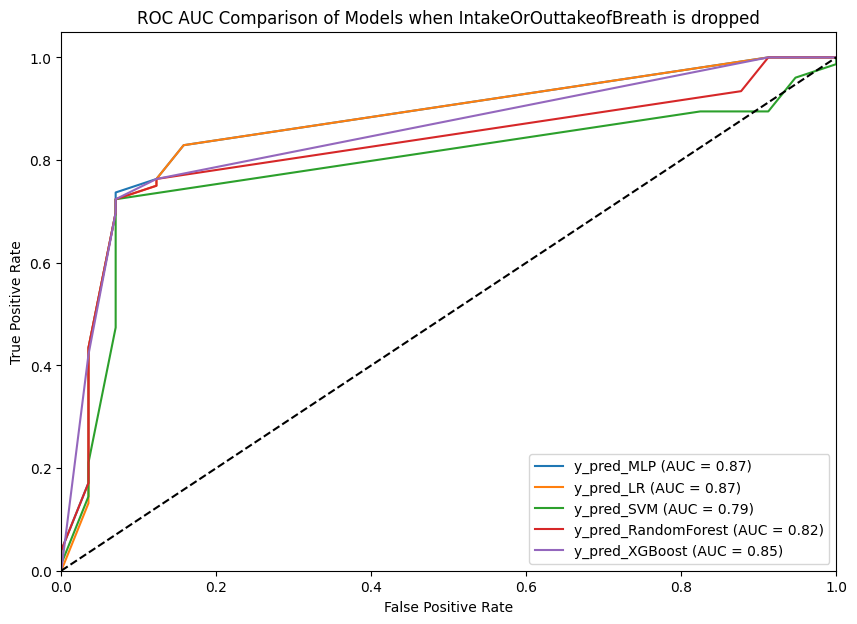

In [ ]:


# -----------------------------
# Step 0: Drop NaNs
# -----------------------------
features = ['PitchAnomaly', 'PauseAnomaly', 'BurstsAnomaly', 'SoundQualityAnomay']

train_data = df_edlfs_train.dropna(subset=features + ['y_true']).copy()
test_data = df_edlfs_test.dropna(subset=features + ['y_true']).copy()

X_train = train_data[features].apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(train_data['y_true'], errors='coerce')
X_test = test_data[features].apply(pd.to_numeric, errors='coerce')
y_test = pd.to_numeric(test_data['y_true'], errors='coerce')

# Drop any rows that became NaN after conversion
train_clean = X_train.join(y_train).dropna()
X_train = train_clean[features]
y_train = train_clean['y_true']

test_clean = X_test.join(y_test).dropna()
X_test = test_clean[features]
y_test = test_clean['y_true']

# -----------------------------
# Step 1: Define models and param grids
# -----------------------------
models = {
    'MLP': MLPClassifier(max_iter=500, random_state=42),
    'LR': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

param_grids = {
    'MLP': {'mlp__hidden_layer_sizes': [(50,), (100,)], 'mlp__alpha': [0.0001, 0.001]},
    'LR': {'lr__C': [0.1, 1, 10], 'lr__penalty': ['l2']},
    'SVM': {'svm__C': [0.1, 1, 10], 'svm__kernel': ['linear', 'rbf']},
    'XGBoost': {'xgboost__n_estimators': [100, 200], 'xgboost__max_depth': [3, 6], 'xgboost__learning_rate': [0.01, 0.1]}
}

# -----------------------------
# Step 2: Train models and save probabilities
# -----------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_probs = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    step_name = model_name.lower()

    # Scaling only for models that need it
    if model_name in ['MLP', 'LR', 'SVM']:
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            (step_name, model)
        ])
    else:
        # RandomForest and XGBoost
        pipe = Pipeline([
            (step_name, model)
        ])

    # Only use GridSearchCV for MLP, LR, SVM, XGBoost
    if model_name != 'RandomForest':
        param_grid = param_grids[model_name]
        grid = GridSearchCV(pipe, param_grid, cv=skf, scoring='roc_auc', n_jobs=-1, error_score='raise')
        grid.fit(X_train, y_train)
        y_pred_probs[f'y_pred_{model_name}'] = grid.predict_proba(X_test)[:,1]
    else:
        # RandomForest: just fit with default parameters
        pipe.fit(X_train, y_train)
        y_pred_probs[f'y_pred_{model_name}'] = pipe.predict_proba(X_test)[:,1]

# -----------------------------
# Step 3: Plot ROC AUC comparison
# -----------------------------
plt.figure(figsize=(10, 7))

for model_name, probs in y_pred_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Comparison of Models when IntakeOrOuttakeofBreath is dropped')
plt.legend(loc='lower right')
plt.show()


Training MLP...
Training LR...
Training SVM...
Training RandomForest...
Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:00:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


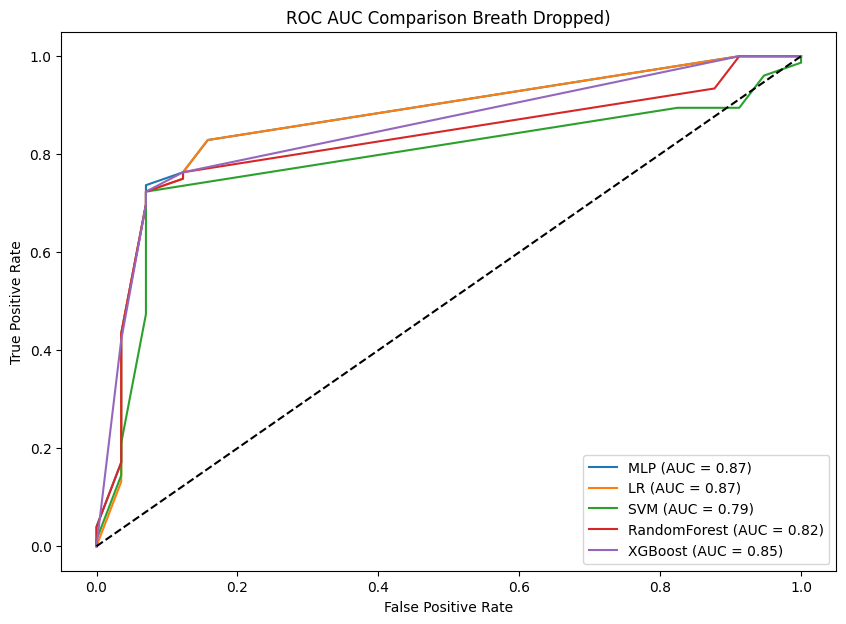


Logistic Regression (threshold = 0.5)
Accuracy: 0.797
AUC:      0.866
FPR:      0.070
TPR:      0.697

Best Logistic Regression hyperparameters:
Penalty:   l2
C:         0.1
Solver:    lbfgs
Max_iter:  1000


In [ ]:


# -----------------------------
# Step 0: Drop NaNs
# -----------------------------
features = [
    'PitchAnomaly',
    'PauseAnomaly',
    'BurstsAnomaly',
    'SoundQualityAnomay'
]

train_data = df_edlfs_train.dropna(subset=features + ['y_true']).copy()
test_data = df_edlfs_test.dropna(subset=features + ['y_true']).copy()

X_train = train_data[features].apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(train_data['y_true'], errors='coerce')
X_test = test_data[features].apply(pd.to_numeric, errors='coerce')
y_test = pd.to_numeric(test_data['y_true'], errors='coerce')

train_clean = X_train.join(y_train).dropna()
X_train = train_clean[features]
y_train = train_clean['y_true']

test_clean = X_test.join(y_test).dropna()
X_test = test_clean[features]
y_test = test_clean['y_true']

# -----------------------------
# Step 1: Models & grids
# -----------------------------
models = {
    'MLP': MLPClassifier(max_iter=500, random_state=42),
    'LR': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
}

param_grids = {
    'MLP': {
        'mlp__hidden_layer_sizes': [(50,), (100,)],
        'mlp__alpha': [0.0001, 0.001]
    },
    'LR': {
        'lr__C': [0.1, 1, 10],
        'lr__penalty': ['l2']
    },
    'SVM': {
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['linear', 'rbf']
    },
    'XGBoost': {
        'xgboost__n_estimators': [100, 200],
        'xgboost__max_depth': [3, 6],
        'xgboost__learning_rate': [0.01, 0.1]
    }
}

# -----------------------------
# Step 2: Training
# -----------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grids = {}
best_estimators = {}
y_pred_probs = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    step_name = model_name.lower()

    if model_name in ['MLP', 'LR', 'SVM']:
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            (step_name, model)
        ])
    else:
        pipe = Pipeline([
            (step_name, model)
        ])

    if model_name != 'RandomForest':
        grid = GridSearchCV(
            pipe,
            param_grids[model_name],
            cv=skf,
            scoring='roc_auc',
            n_jobs=-1
        )
        grid.fit(X_train, y_train)

        grids[model_name] = grid
        best_estimators[model_name] = grid.best_estimator_
        y_pred_probs[model_name] = grid.predict_proba(X_test)[:, 1]

    else:
        pipe.fit(X_train, y_train)
        best_estimators[model_name] = pipe
        y_pred_probs[model_name] = pipe.predict_proba(X_test)[:, 1]

# -----------------------------
# Step 3: ROC curves (all models)
# -----------------------------
plt.figure(figsize=(10, 7))

for model_name, probs in y_pred_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Comparison Breath Dropped)')
plt.legend(loc='lower right')
plt.show()

# ======================================================
# Step 4: Logistic Regression metrics (threshold = 0.5)
# ======================================================
best_lr = best_estimators['LR']

# Sanity check
from sklearn.linear_model import LogisticRegression
assert isinstance(
    best_lr.named_steps['lr'], LogisticRegression
)

y_prob_lr = best_lr.predict_proba(X_test)[:, 1]
y_pred_lr = (y_prob_lr >= 0.5).astype(int)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
fpr_05 = fp / (fp + tn)
tpr_05 = tp / (tp + fn)

print("\nLogistic Regression (threshold = 0.5)")
print(f"Accuracy: {accuracy_lr:.3f}")
print(f"AUC:      {auc_lr:.3f}")
print(f"FPR:      {fpr_05:.3f}")
print(f"TPR:      {tpr_05:.3f}")

# -----------------------------
# Step 5: Report LR hyperparameters
# -----------------------------
lr_params = best_lr.named_steps['lr'].get_params()

print("\nBest Logistic Regression hyperparameters:")
print(f"Penalty:   {lr_params['penalty']}")
print(f"C:         {lr_params['C']}")
print(f"Solver:    {lr_params['solver']}")
print(f"Max_iter:  {lr_params['max_iter']}")


Training MLP...
Training LR...
Training SVM...
Training RandomForest...
Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:41:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


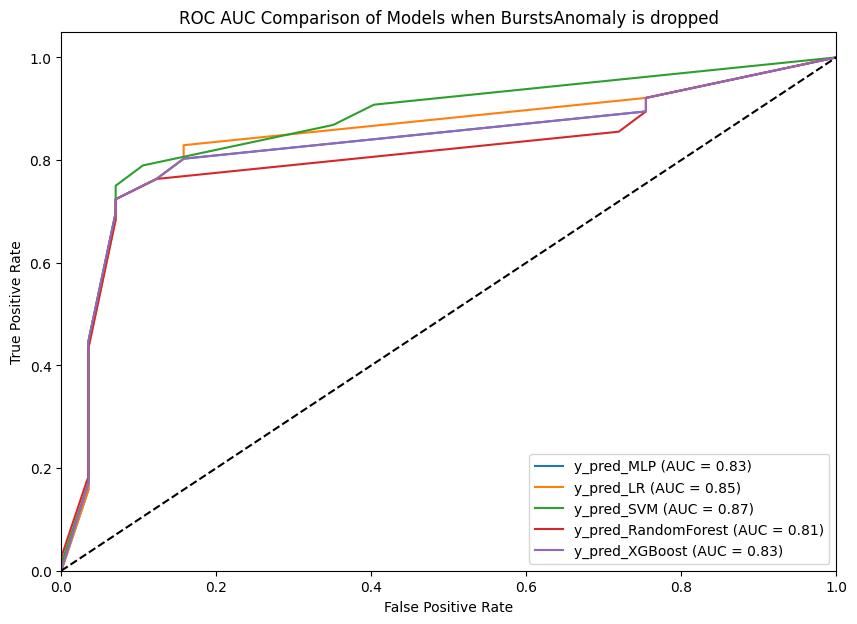

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

# -----------------------------
# Step 0: Drop NaNs
# -----------------------------
features = ['PitchAnomaly', 'PauseAnomaly',
            'IntakeOrOuttakeofBreath', 'SoundQualityAnomay']

train_data = df_edlfs_train.dropna(subset=features + ['y_true']).copy()
test_data = df_edlfs_test.dropna(subset=features + ['y_true']).copy()

X_train = train_data[features].apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(train_data['y_true'], errors='coerce')
X_test = test_data[features].apply(pd.to_numeric, errors='coerce')
y_test = pd.to_numeric(test_data['y_true'], errors='coerce')

# Drop any rows that became NaN after conversion
train_clean = X_train.join(y_train).dropna()
X_train = train_clean[features]
y_train = train_clean['y_true']

test_clean = X_test.join(y_test).dropna()
X_test = test_clean[features]
y_test = test_clean['y_true']

# -----------------------------
# Step 1: Define models and param grids
# -----------------------------
models = {
    'MLP': MLPClassifier(max_iter=500, random_state=42),
    'LR': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

param_grids = {
    'MLP': {'mlp__hidden_layer_sizes': [(50,), (100,)], 'mlp__alpha': [0.0001, 0.001]},
    'LR': {'lr__C': [0.1, 1, 10], 'lr__penalty': ['l2']},
    'SVM': {'svm__C': [0.1, 1, 10], 'svm__kernel': ['linear', 'rbf']},
    'XGBoost': {'xgboost__n_estimators': [100, 200], 'xgboost__max_depth': [3, 6], 'xgboost__learning_rate': [0.01, 0.1]}
}

# -----------------------------
# Step 2: Train models and save probabilities
# -----------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_probs = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    step_name = model_name.lower()

    # Scaling only for models that need it
    if model_name in ['MLP', 'LR', 'SVM']:
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            (step_name, model)
        ])
    else:
        # RandomForest and XGBoost
        pipe = Pipeline([
            (step_name, model)
        ])

    # Only use GridSearchCV for MLP, LR, SVM, XGBoost
    if model_name != 'RandomForest':
        param_grid = param_grids[model_name]
        grid = GridSearchCV(pipe, param_grid, cv=skf, scoring='roc_auc', n_jobs=-1, error_score='raise')
        grid.fit(X_train, y_train)
        y_pred_probs[f'y_pred_{model_name}'] = grid.predict_proba(X_test)[:,1]
    else:
        # RandomForest: just fit with default parameters
        pipe.fit(X_train, y_train)
        y_pred_probs[f'y_pred_{model_name}'] = pipe.predict_proba(X_test)[:,1]

# -----------------------------
# Step 3: Plot ROC AUC comparison
# -----------------------------
plt.figure(figsize=(10, 7))

for model_name, probs in y_pred_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Comparison of Models when BurstsAnomaly is dropped')
plt.legend(loc='lower right')
plt.show()


Training MLP...
Training LR...
Training SVM...
Training RandomForest...
Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:02:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


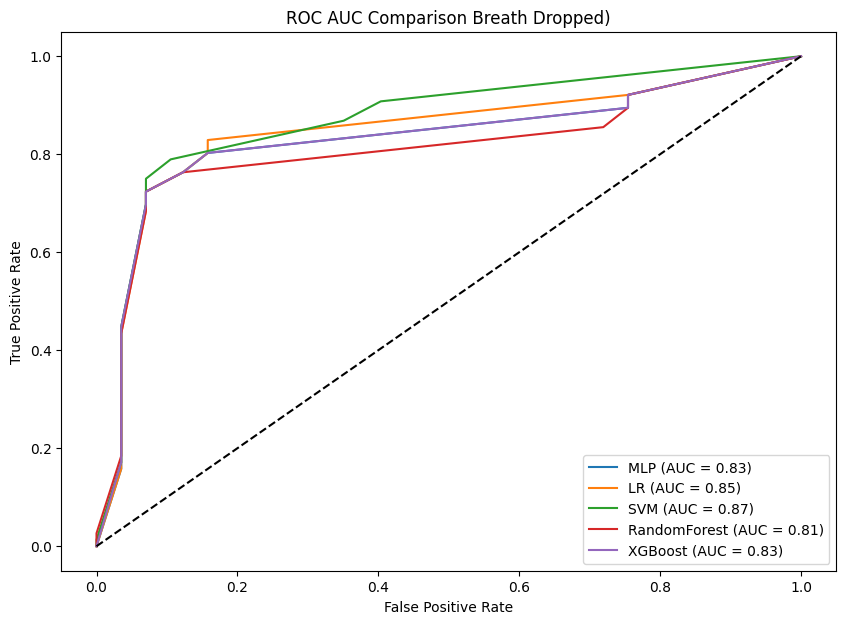


Logistic Regression (threshold = 0.5)
Accuracy: 0.797
AUC:      0.847
FPR:      0.070
TPR:      0.697

Best Logistic Regression hyperparameters:
Penalty:   l2
C:         0.1
Solver:    lbfgs
Max_iter:  1000


In [ ]:


# -----------------------------
# Step 0: Drop NaNs
# -----------------------------
features = [
    'PitchAnomaly',
    'PauseAnomaly',
    'IntakeOrOuttakeofBreath',
    'SoundQualityAnomay'
]

train_data = df_edlfs_train.dropna(subset=features + ['y_true']).copy()
test_data = df_edlfs_test.dropna(subset=features + ['y_true']).copy()

X_train = train_data[features].apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(train_data['y_true'], errors='coerce')
X_test = test_data[features].apply(pd.to_numeric, errors='coerce')
y_test = pd.to_numeric(test_data['y_true'], errors='coerce')

train_clean = X_train.join(y_train).dropna()
X_train = train_clean[features]
y_train = train_clean['y_true']

test_clean = X_test.join(y_test).dropna()
X_test = test_clean[features]
y_test = test_clean['y_true']

# -----------------------------
# Step 1: Models & grids
# -----------------------------
models = {
    'MLP': MLPClassifier(max_iter=500, random_state=42),
    'LR': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
}

param_grids = {
    'MLP': {
        'mlp__hidden_layer_sizes': [(50,), (100,)],
        'mlp__alpha': [0.0001, 0.001]
    },
    'LR': {
        'lr__C': [0.1, 1, 10],
        'lr__penalty': ['l2']
    },
    'SVM': {
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['linear', 'rbf']
    },
    'XGBoost': {
        'xgboost__n_estimators': [100, 200],
        'xgboost__max_depth': [3, 6],
        'xgboost__learning_rate': [0.01, 0.1]
    }
}

# -----------------------------
# Step 2: Training
# -----------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grids = {}
best_estimators = {}
y_pred_probs = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    step_name = model_name.lower()

    if model_name in ['MLP', 'LR', 'SVM']:
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            (step_name, model)
        ])
    else:
        pipe = Pipeline([
            (step_name, model)
        ])

    if model_name != 'RandomForest':
        grid = GridSearchCV(
            pipe,
            param_grids[model_name],
            cv=skf,
            scoring='roc_auc',
            n_jobs=-1
        )
        grid.fit(X_train, y_train)

        grids[model_name] = grid
        best_estimators[model_name] = grid.best_estimator_
        y_pred_probs[model_name] = grid.predict_proba(X_test)[:, 1]

    else:
        pipe.fit(X_train, y_train)
        best_estimators[model_name] = pipe
        y_pred_probs[model_name] = pipe.predict_proba(X_test)[:, 1]

# -----------------------------
# Step 3: ROC curves (all models)
# -----------------------------
plt.figure(figsize=(10, 7))

for model_name, probs in y_pred_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Comparison Breath Dropped)')
plt.legend(loc='lower right')
plt.show()

# ======================================================
# Step 4: Logistic Regression metrics (threshold = 0.5)
# ======================================================
best_lr = best_estimators['LR']

# Sanity check
from sklearn.linear_model import LogisticRegression
assert isinstance(
    best_lr.named_steps['lr'], LogisticRegression
)

y_prob_lr = best_lr.predict_proba(X_test)[:, 1]
y_pred_lr = (y_prob_lr >= 0.5).astype(int)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
fpr_05 = fp / (fp + tn)
tpr_05 = tp / (tp + fn)

print("\nLogistic Regression (threshold = 0.5)")
print(f"Accuracy: {accuracy_lr:.3f}")
print(f"AUC:      {auc_lr:.3f}")
print(f"FPR:      {fpr_05:.3f}")
print(f"TPR:      {tpr_05:.3f}")

# -----------------------------
# Step 5: Report LR hyperparameters
# -----------------------------
lr_params = best_lr.named_steps['lr'].get_params()

print("\nBest Logistic Regression hyperparameters:")
print(f"Penalty:   {lr_params['penalty']}")
print(f"C:         {lr_params['C']}")
print(f"Solver:    {lr_params['solver']}")
print(f"Max_iter:  {lr_params['max_iter']}")


Training MLP...
Training LR...
Training SVM...
Training RandomForest...
Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:42:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


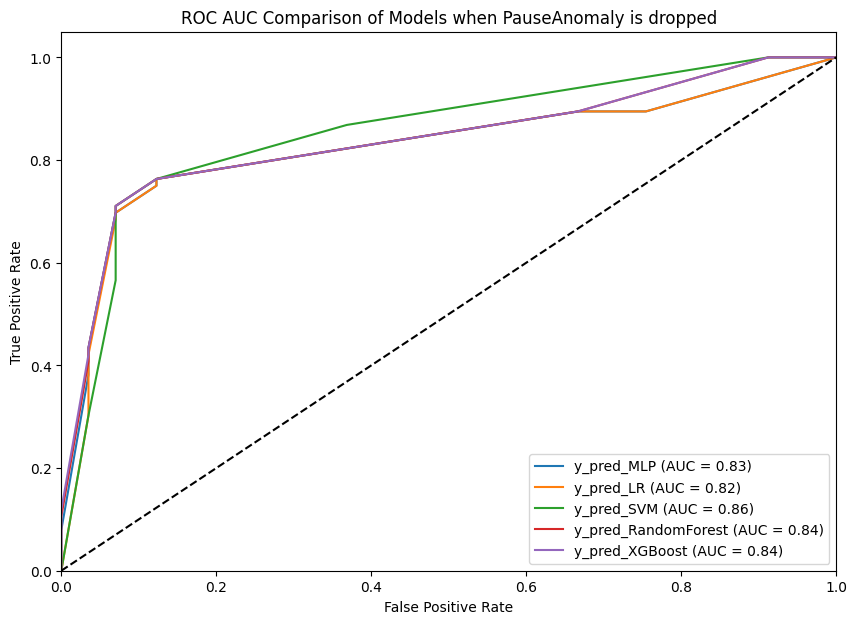

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

# -----------------------------
# Step 0: Drop NaNs
# -----------------------------
features = ['PitchAnomaly', 'BurstsAnomaly',
            'IntakeOrOuttakeofBreath', 'SoundQualityAnomay']

train_data = df_edlfs_train.dropna(subset=features + ['y_true']).copy()
test_data = df_edlfs_test.dropna(subset=features + ['y_true']).copy()

X_train = train_data[features].apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(train_data['y_true'], errors='coerce')
X_test = test_data[features].apply(pd.to_numeric, errors='coerce')
y_test = pd.to_numeric(test_data['y_true'], errors='coerce')

# Drop any rows that became NaN after conversion
train_clean = X_train.join(y_train).dropna()
X_train = train_clean[features]
y_train = train_clean['y_true']

test_clean = X_test.join(y_test).dropna()
X_test = test_clean[features]
y_test = test_clean['y_true']

# -----------------------------
# Step 1: Define models and param grids
# -----------------------------
models = {
    'MLP': MLPClassifier(max_iter=500, random_state=42),
    'LR': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

param_grids = {
    'MLP': {'mlp__hidden_layer_sizes': [(50,), (100,)], 'mlp__alpha': [0.0001, 0.001]},
    'LR': {'lr__C': [0.1, 1, 10], 'lr__penalty': ['l2']},
    'SVM': {'svm__C': [0.1, 1, 10], 'svm__kernel': ['linear', 'rbf']},
    'XGBoost': {'xgboost__n_estimators': [100, 200], 'xgboost__max_depth': [3, 6], 'xgboost__learning_rate': [0.01, 0.1]}
}

# -----------------------------
# Step 2: Train models and save probabilities
# -----------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_probs = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    step_name = model_name.lower()

    # Scaling only for models that need it
    if model_name in ['MLP', 'LR', 'SVM']:
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            (step_name, model)
        ])
    else:
        # RandomForest and XGBoost
        pipe = Pipeline([
            (step_name, model)
        ])

    # Only use GridSearchCV for MLP, LR, SVM, XGBoost
    if model_name != 'RandomForest':
        param_grid = param_grids[model_name]
        grid = GridSearchCV(pipe, param_grid, cv=skf, scoring='roc_auc', n_jobs=-1, error_score='raise')
        grid.fit(X_train, y_train)
        y_pred_probs[f'y_pred_{model_name}'] = grid.predict_proba(X_test)[:,1]
    else:
        # RandomForest: just fit with default parameters
        pipe.fit(X_train, y_train)
        y_pred_probs[f'y_pred_{model_name}'] = pipe.predict_proba(X_test)[:,1]

# -----------------------------
# Step 3: Plot ROC AUC comparison
# -----------------------------
plt.figure(figsize=(10, 7))

for model_name, probs in y_pred_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Comparison of Models when PauseAnomaly is dropped')
plt.legend(loc='lower right')
plt.show()


Training MLP...
Training LR...
Training SVM...
Training RandomForest...
Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:04:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


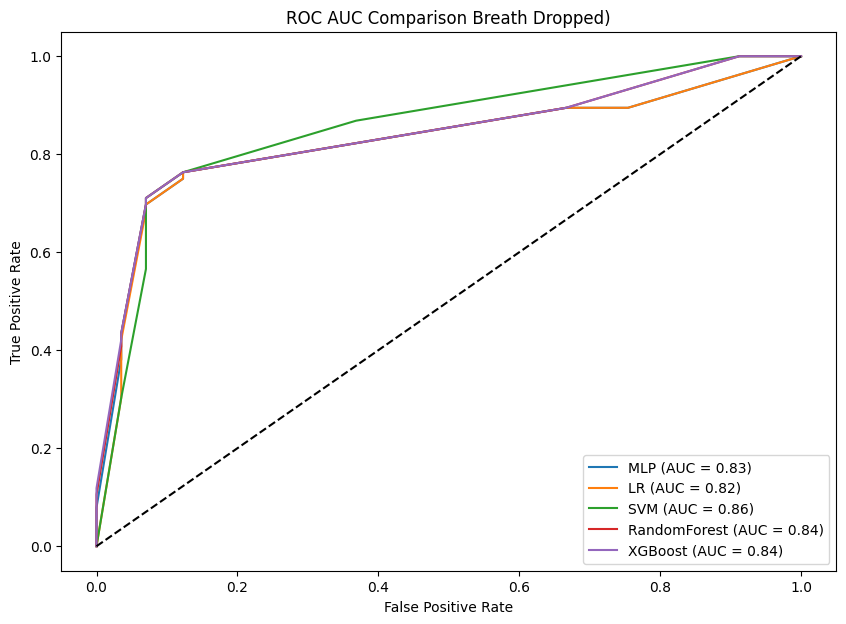


Logistic Regression (threshold = 0.5)
Accuracy: 0.797
AUC:      0.825
FPR:      0.070
TPR:      0.697

Best Logistic Regression hyperparameters:
Penalty:   l2
C:         10
Solver:    lbfgs
Max_iter:  1000


In [ ]:


# -----------------------------
# Step 0: Drop NaNs
# -----------------------------
features = [
    'PitchAnomaly',
    'BurstsAnomaly',
    'IntakeOrOuttakeofBreath',
    'SoundQualityAnomay'
]

train_data = df_edlfs_train.dropna(subset=features + ['y_true']).copy()
test_data = df_edlfs_test.dropna(subset=features + ['y_true']).copy()

X_train = train_data[features].apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(train_data['y_true'], errors='coerce')
X_test = test_data[features].apply(pd.to_numeric, errors='coerce')
y_test = pd.to_numeric(test_data['y_true'], errors='coerce')

train_clean = X_train.join(y_train).dropna()
X_train = train_clean[features]
y_train = train_clean['y_true']

test_clean = X_test.join(y_test).dropna()
X_test = test_clean[features]
y_test = test_clean['y_true']

# -----------------------------
# Step 1: Models & grids
# -----------------------------
models = {
    'MLP': MLPClassifier(max_iter=500, random_state=42),
    'LR': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
}

param_grids = {
    'MLP': {
        'mlp__hidden_layer_sizes': [(50,), (100,)],
        'mlp__alpha': [0.0001, 0.001]
    },
    'LR': {
        'lr__C': [0.1, 1, 10],
        'lr__penalty': ['l2']
    },
    'SVM': {
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['linear', 'rbf']
    },
    'XGBoost': {
        'xgboost__n_estimators': [100, 200],
        'xgboost__max_depth': [3, 6],
        'xgboost__learning_rate': [0.01, 0.1]
    }
}

# -----------------------------
# Step 2: Training
# -----------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grids = {}
best_estimators = {}
y_pred_probs = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    step_name = model_name.lower()

    if model_name in ['MLP', 'LR', 'SVM']:
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            (step_name, model)
        ])
    else:
        pipe = Pipeline([
            (step_name, model)
        ])

    if model_name != 'RandomForest':
        grid = GridSearchCV(
            pipe,
            param_grids[model_name],
            cv=skf,
            scoring='roc_auc',
            n_jobs=-1
        )
        grid.fit(X_train, y_train)

        grids[model_name] = grid
        best_estimators[model_name] = grid.best_estimator_
        y_pred_probs[model_name] = grid.predict_proba(X_test)[:, 1]

    else:
        pipe.fit(X_train, y_train)
        best_estimators[model_name] = pipe
        y_pred_probs[model_name] = pipe.predict_proba(X_test)[:, 1]

# -----------------------------
# Step 3: ROC curves (all models)
# -----------------------------
plt.figure(figsize=(10, 7))

for model_name, probs in y_pred_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Comparison Breath Dropped)')
plt.legend(loc='lower right')
plt.show()

# ======================================================
# Step 4: Logistic Regression metrics (threshold = 0.5)
# ======================================================
best_lr = best_estimators['LR']

# Sanity check
from sklearn.linear_model import LogisticRegression
assert isinstance(
    best_lr.named_steps['lr'], LogisticRegression
)

y_prob_lr = best_lr.predict_proba(X_test)[:, 1]
y_pred_lr = (y_prob_lr >= 0.5).astype(int)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
fpr_05 = fp / (fp + tn)
tpr_05 = tp / (tp + fn)

print("\nLogistic Regression (threshold = 0.5)")
print(f"Accuracy: {accuracy_lr:.3f}")
print(f"AUC:      {auc_lr:.3f}")
print(f"FPR:      {fpr_05:.3f}")
print(f"TPR:      {tpr_05:.3f}")

# -----------------------------
# Step 5: Report LR hyperparameters
# -----------------------------
lr_params = best_lr.named_steps['lr'].get_params()

print("\nBest Logistic Regression hyperparameters:")
print(f"Penalty:   {lr_params['penalty']}")
print(f"C:         {lr_params['C']}")
print(f"Solver:    {lr_params['solver']}")
print(f"Max_iter:  {lr_params['max_iter']}")


Training MLP...
Training LR...
Training SVM...
Training RandomForest...
Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:43:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


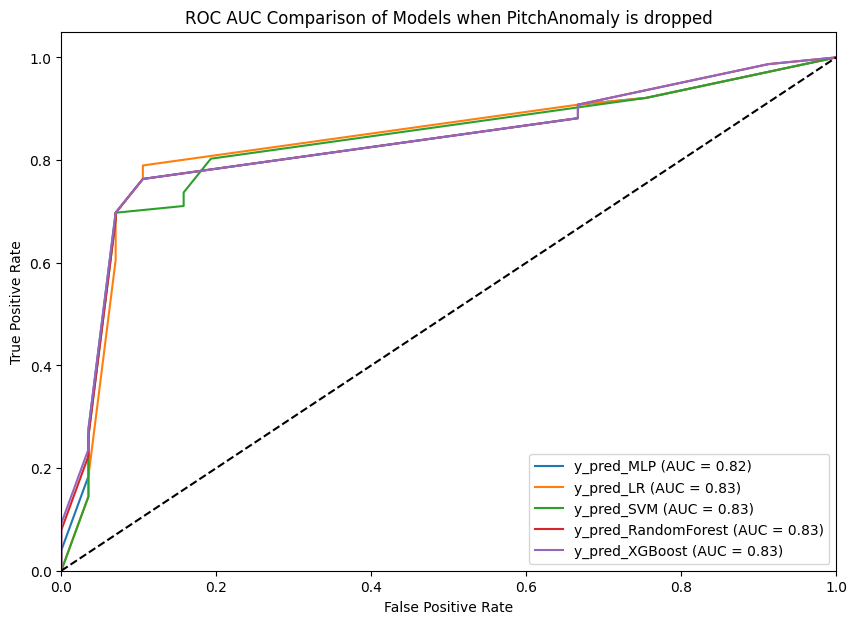

In [ ]:


# -----------------------------
# Step 0: Drop NaNs
# -----------------------------
features = ['PauseAnomaly', 'BurstsAnomaly',
            'IntakeOrOuttakeofBreath', 'SoundQualityAnomay']

train_data = df_edlfs_train.dropna(subset=features + ['y_true']).copy()
test_data = df_edlfs_test.dropna(subset=features + ['y_true']).copy()

X_train = train_data[features].apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(train_data['y_true'], errors='coerce')
X_test = test_data[features].apply(pd.to_numeric, errors='coerce')
y_test = pd.to_numeric(test_data['y_true'], errors='coerce')

# Drop any rows that became NaN after conversion
train_clean = X_train.join(y_train).dropna()
X_train = train_clean[features]
y_train = train_clean['y_true']

test_clean = X_test.join(y_test).dropna()
X_test = test_clean[features]
y_test = test_clean['y_true']

# -----------------------------
# Step 1: Define models and param grids
# -----------------------------
models = {
    'MLP': MLPClassifier(max_iter=500, random_state=42),
    'LR': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

param_grids = {
    'MLP': {'mlp__hidden_layer_sizes': [(50,), (100,)], 'mlp__alpha': [0.0001, 0.001]},
    'LR': {'lr__C': [0.1, 1, 10], 'lr__penalty': ['l2']},
    'SVM': {'svm__C': [0.1, 1, 10], 'svm__kernel': ['linear', 'rbf']},
    'XGBoost': {'xgboost__n_estimators': [100, 200], 'xgboost__max_depth': [3, 6], 'xgboost__learning_rate': [0.01, 0.1]}
}

# -----------------------------
# Step 2: Train models and save probabilities
# -----------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_probs = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    step_name = model_name.lower()

    # Scaling only for models that need it
    if model_name in ['MLP', 'LR', 'SVM']:
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            (step_name, model)
        ])
    else:
        # RandomForest and XGBoost
        pipe = Pipeline([
            (step_name, model)
        ])

    # Only use GridSearchCV for MLP, LR, SVM, XGBoost
    if model_name != 'RandomForest':
        param_grid = param_grids[model_name]
        grid = GridSearchCV(pipe, param_grid, cv=skf, scoring='roc_auc', n_jobs=-1, error_score='raise')
        grid.fit(X_train, y_train)
        y_pred_probs[f'y_pred_{model_name}'] = grid.predict_proba(X_test)[:,1]
    else:
        # RandomForest: just fit with default parameters
        pipe.fit(X_train, y_train)
        y_pred_probs[f'y_pred_{model_name}'] = pipe.predict_proba(X_test)[:,1]

# -----------------------------
# Step 3: Plot ROC AUC comparison
# -----------------------------
plt.figure(figsize=(10, 7))

for model_name, probs in y_pred_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Comparison of Models when PitchAnomaly is dropped')
plt.legend(loc='lower right')
plt.show()


Training MLP...
Training LR...
Training SVM...
Training RandomForest...
Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


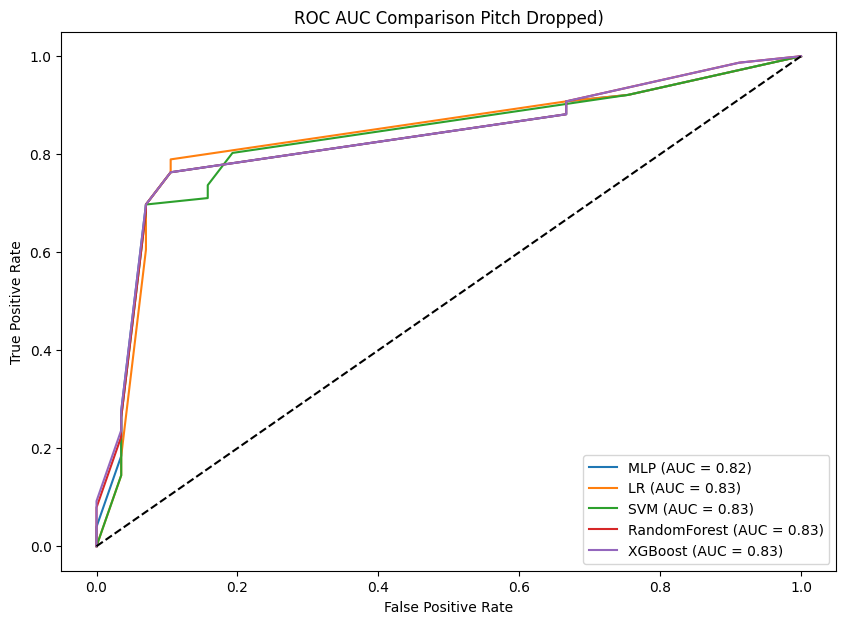


Logistic Regression (threshold = 0.5)
Accuracy: 0.797
AUC:      0.835
FPR:      0.070
TPR:      0.697

Best Logistic Regression hyperparameters:
Penalty:   l2
C:         0.1
Solver:    lbfgs
Max_iter:  1000


In [ ]:


# -----------------------------
# Step 0: Drop NaNs
# -----------------------------
features = [
    'PauseAnomaly',
    'BurstsAnomaly',
    'IntakeOrOuttakeofBreath',
    'SoundQualityAnomay'
]

train_data = df_edlfs_train.dropna(subset=features + ['y_true']).copy()
test_data = df_edlfs_test.dropna(subset=features + ['y_true']).copy()

X_train = train_data[features].apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(train_data['y_true'], errors='coerce')
X_test = test_data[features].apply(pd.to_numeric, errors='coerce')
y_test = pd.to_numeric(test_data['y_true'], errors='coerce')

train_clean = X_train.join(y_train).dropna()
X_train = train_clean[features]
y_train = train_clean['y_true']

test_clean = X_test.join(y_test).dropna()
X_test = test_clean[features]
y_test = test_clean['y_true']

# -----------------------------
# Step 1: Models & grids
# -----------------------------
models = {
    'MLP': MLPClassifier(max_iter=500, random_state=42),
    'LR': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
}

param_grids = {
    'MLP': {
        'mlp__hidden_layer_sizes': [(50,), (100,)],
        'mlp__alpha': [0.0001, 0.001]
    },
    'LR': {
        'lr__C': [0.1, 1, 10],
        'lr__penalty': ['l2']
    },
    'SVM': {
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['linear', 'rbf']
    },
    'XGBoost': {
        'xgboost__n_estimators': [100, 200],
        'xgboost__max_depth': [3, 6],
        'xgboost__learning_rate': [0.01, 0.1]
    }
}

# -----------------------------
# Step 2: Training
# -----------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grids = {}
best_estimators = {}
y_pred_probs = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    step_name = model_name.lower()

    if model_name in ['MLP', 'LR', 'SVM']:
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            (step_name, model)
        ])
    else:
        pipe = Pipeline([
            (step_name, model)
        ])

    if model_name != 'RandomForest':
        grid = GridSearchCV(
            pipe,
            param_grids[model_name],
            cv=skf,
            scoring='roc_auc',
            n_jobs=-1
        )
        grid.fit(X_train, y_train)

        grids[model_name] = grid
        best_estimators[model_name] = grid.best_estimator_
        y_pred_probs[model_name] = grid.predict_proba(X_test)[:, 1]

    else:
        pipe.fit(X_train, y_train)
        best_estimators[model_name] = pipe
        y_pred_probs[model_name] = pipe.predict_proba(X_test)[:, 1]

# -----------------------------
# Step 3: ROC curves (all models)
# -----------------------------
plt.figure(figsize=(10, 7))

for model_name, probs in y_pred_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Comparison Pitch Dropped)')
plt.legend(loc='lower right')
plt.show()

# ======================================================
# Step 4: Logistic Regression metrics (threshold = 0.5)
# ======================================================
best_lr = best_estimators['LR']

# Sanity check
from sklearn.linear_model import LogisticRegression
assert isinstance(
    best_lr.named_steps['lr'], LogisticRegression
)

y_prob_lr = best_lr.predict_proba(X_test)[:, 1]
y_pred_lr = (y_prob_lr >= 0.5).astype(int)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
fpr_05 = fp / (fp + tn)
tpr_05 = tp / (tp + fn)

print("\nLogistic Regression (threshold = 0.5)")
print(f"Accuracy: {accuracy_lr:.3f}")
print(f"AUC:      {auc_lr:.3f}")
print(f"FPR:      {fpr_05:.3f}")
print(f"TPR:      {tpr_05:.3f}")

# -----------------------------
# Step 5: Report LR hyperparameters
# -----------------------------
lr_params = best_lr.named_steps['lr'].get_params()

print("\nBest Logistic Regression hyperparameters:")
print(f"Penalty:   {lr_params['penalty']}")
print(f"C:         {lr_params['C']}")
print(f"Solver:    {lr_params['solver']}")
print(f"Max_iter:  {lr_params['max_iter']}")


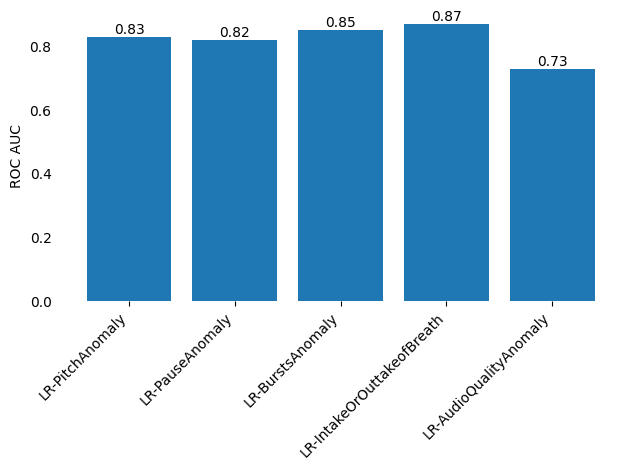

In [ ]:
import matplotlib.pyplot as plt

labels = [
    "LR-PitchAnomaly",
    "LR-PauseAnomaly",
    "LR-BurstsAnomaly",
    "LR-IntakeOrOuttakeofBreath",
    "LR-AudioQualityAnomaly"
]

values = [0.83, 0.82, 0.85, 0.87, 0.73]

plt.figure()
bars = plt.bar(labels, values)

plt.xticks(rotation=45, ha="right")
plt.ylabel("ROC AUC")
#plt.title("Logistic Regression ROC AUC when each of the EDLFs is dropped ")

# Remove the box (spines)
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Optional: remove y-axis ticks too (very clean)
ax.tick_params(left=False)

# Add values above bars
for bar, value in zip(bars, values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{value:.2f}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()


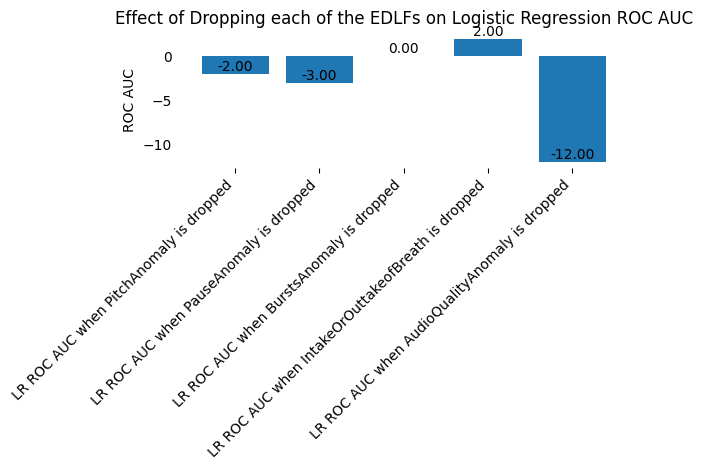

In [ ]:
import matplotlib.pyplot as plt

labels = [
    "LR ROC AUC when PitchAnomaly is dropped",
    "LR ROC AUC when PauseAnomaly is dropped",
    "LR ROC AUC when BurstsAnomaly is dropped",
    "LR ROC AUC when IntakeOrOuttakeofBreath is dropped",
    "LR ROC AUC when AudioQualityAnomaly is dropped"
]

values = [-2, -3, 0, +2, -12]

plt.figure()
bars = plt.bar(labels, values)

plt.xticks(rotation=45, ha="right")
plt.ylabel("ROC AUC")
plt.title("Effect of Dropping each of the EDLFs on Logistic Regression ROC AUC")

# Remove the box (spines)
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Optional: remove y-axis ticks too (very clean)
ax.tick_params(left=False)

# Add values above bars
for bar, value in zip(bars, values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{value:.2f}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()


In [ ]:

best_lr = grid.best_estimator_

y_pred_train_lr = best_lr.predict_proba(X_train)[:, 1]
y_pred_test_lr  = best_lr.predict_proba(X_test)[:, 1]


In [ ]:
y_pred_train_lr
y_pred_test_lr


In [ ]:
df_edlfs_train['y_pred_train_lr']= y_pred_train_lr

In [ ]:
df_edlfs_test

In [ ]:
df_edlfs_test['y_pred_test_lr']= y_pred_test_lr

In [ ]:
df_edlfs_test.to_excel('final_test.xlsx')
# will be in the sheet of the excel file SARA_CURRENT_2_6_2026_DATASET_EDLFs.xlsx

In [ ]:
df_edlfs_train.to_excel('final_train.xlsx')
# will be in the sheet of the excel file SARA_CURRENT_2_6_2026_DATASET_EDLFs.xlsx

Training MLP...
Training LR...
Training SVM...
Training RandomForest...
Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:18:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


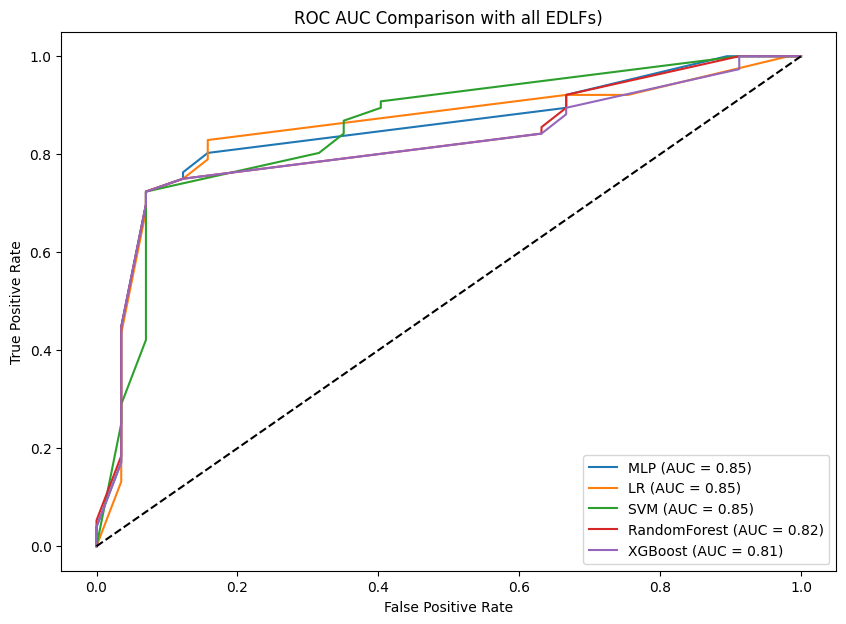


Logistic Regression (threshold = 0.5)
Accuracy: 0.797
AUC:      0.850
FPR:      0.070
TPR:      0.697

Best Logistic Regression hyperparameters:
Penalty:   l2
C:         0.1
Solver:    lbfgs
Max_iter:  1000


In [ ]:


# -----------------------------
# Step 0: Drop NaNs
# -----------------------------
features = [
    'PitchAnomaly',
    'BurstsAnomaly',
    'IntakeOrOuttakeofBreath',
    'SoundQualityAnomay',
    'PauseAnomaly'
]

train_data = df_edlfs_train.dropna(subset=features + ['y_true']).copy()
test_data = df_edlfs_test.dropna(subset=features + ['y_true']).copy()

X_train = train_data[features].apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(train_data['y_true'], errors='coerce')
X_test = test_data[features].apply(pd.to_numeric, errors='coerce')
y_test = pd.to_numeric(test_data['y_true'], errors='coerce')

train_clean = X_train.join(y_train).dropna()
X_train = train_clean[features]
y_train = train_clean['y_true']

test_clean = X_test.join(y_test).dropna()
X_test = test_clean[features]
y_test = test_clean['y_true']

# -----------------------------
# Step 1: Models & grids
# -----------------------------
models = {
    'MLP': MLPClassifier(max_iter=500, random_state=42),
    'LR': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
}

param_grids = {
    'MLP': {
        'mlp__hidden_layer_sizes': [(50,), (100,)],
        'mlp__alpha': [0.0001, 0.001]
    },
    'LR': {
        'lr__C': [0.1, 1, 10],
        'lr__penalty': ['l2']
    },
    'SVM': {
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['linear', 'rbf']
    },
    'XGBoost': {
        'xgboost__n_estimators': [100, 200],
        'xgboost__max_depth': [3, 6],
        'xgboost__learning_rate': [0.01, 0.1]
    }
}

# -----------------------------
# Step 2: Training
# -----------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grids = {}
best_estimators = {}
y_pred_probs = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    step_name = model_name.lower()

    if model_name in ['MLP', 'LR', 'SVM']:
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            (step_name, model)
        ])
    else:
        pipe = Pipeline([
            (step_name, model)
        ])

    if model_name != 'RandomForest':
        grid = GridSearchCV(
            pipe,
            param_grids[model_name],
            cv=skf,
            scoring='roc_auc',
            n_jobs=-1
        )
        grid.fit(X_train, y_train)

        grids[model_name] = grid
        best_estimators[model_name] = grid.best_estimator_
        y_pred_probs[model_name] = grid.predict_proba(X_test)[:, 1]

    else:
        pipe.fit(X_train, y_train)
        best_estimators[model_name] = pipe
        y_pred_probs[model_name] = pipe.predict_proba(X_test)[:, 1]

# -----------------------------
# Step 3: ROC curves (all models)
# -----------------------------
plt.figure(figsize=(10, 7))

for model_name, probs in y_pred_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Comparison with all EDLFs)')
plt.legend(loc='lower right')
plt.show()

# ======================================================
# Step 4: Logistic Regression metrics (threshold = 0.5)
# ======================================================
best_lr = best_estimators['LR']

# Sanity check
from sklearn.linear_model import LogisticRegression
assert isinstance(
    best_lr.named_steps['lr'], LogisticRegression
)

y_prob_lr = best_lr.predict_proba(X_test)[:, 1]
y_pred_lr = (y_prob_lr >= 0.5).astype(int)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
fpr_05 = fp / (fp + tn)
tpr_05 = tp / (tp + fn)

print("\nLogistic Regression (threshold = 0.5)")
print(f"Accuracy: {accuracy_lr:.3f}")
print(f"AUC:      {auc_lr:.3f}")
print(f"FPR:      {fpr_05:.3f}")
print(f"TPR:      {tpr_05:.3f}")

# -----------------------------
# Step 5: Report LR hyperparameters
# -----------------------------
lr_params = best_lr.named_steps['lr'].get_params()

print("\nBest Logistic Regression hyperparameters:")
print(f"Penalty:   {lr_params['penalty']}")
print(f"C:         {lr_params['C']}")
print(f"Solver:    {lr_params['solver']}")
print(f"Max_iter:  {lr_params['max_iter']}")
